# TELECOMMUNICATION CHURN OF IBM
### ( UNITES STATES , State : California)

## PROBLEM STATEMENT:  This is a CLASSIFICATION PROBLEM analysing churn reasons ,to identify CUSTOMERS AT RISK OF CHURNING and PROACTIVE MEASURES TO RETAIN CUSTOMERS.
## DESCRIPTION OF THE COLUMNS.

# Demographics

* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Gender: The customer’s gender: Male, Female

* Age: The customer’s current age, in years, at the time the fiscal quarter ended.

* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Married: Indicates if the customer is married: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* Number of Dependents: Indicates the number of dependents that live with the customer.

# Location

* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Country: The country of the customer’s primary residence.

* State: The state of the customer’s primary residence.

* City: The city of the customer’s primary residence.

* Zip Code: The zip code of the customer’s primary residence.

* Lat Long: The combined latitude and longitude of the customer’s primary residence.

* Latitude: The latitude of the customer’s primary residence.

* Longitude: The longitude of the customer’s primary residence.

# Population

* ID: A unique ID that identifies each row.

* Zip Code: The zip code of the customer’s primary residence.

* Population: A current population estimate for the entire Zip Code area.

# Services

* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).

* Referred a Friend: Indicates if the customer has ever referred a friend or family member to this company: Yes, No

* Number of Referrals: Indicates the number of referrals to date that the customer has made.

* Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

* Offer: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.

* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Avg Monthly Long Distance Charges: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Avg Monthly GB Download: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Unlimited Data: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Total Refunds: Indicates the customer’s total refunds, calculated to the end of the quarter specified above.

* Total Extra Data Charges: Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.

* Total Long Distance Charges: Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.

# Status

* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).

* Satisfaction Score: A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).

* Customer Status: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined

* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# Acknowledgements
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## TARGETS:

* Seperate the 'Churn Value' column and classify the data using Supervised ML(Binary Classification)
* Also on the same we will cluster using Unsupervised model.(Kmeans,Heirarchial clustering ,DBScan, etc.)
* Seperate the 'Churn Status' column to classify the data into 'Churned','Stayed','Joined' categories using Supervised ML.
* Seperate the data into two groups ,one with 'churn' and other with 'not churn'. we will apply classification supervised model in the 'churn data',to classify the 'Churn Reasons'.
 



### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
from numpy import random as r
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
%matplotlib inline

## Merging 5 excel files to form one DATAFRAME.

In [3]:

demo = pd.read_csv("C:\\Users\\daisy\\Desktop\\Project files\\Demographics.csv", encoding='latin-1')
lo   = pd.read_csv("C:\\Users\\daisy\\Desktop\\Project files\\Location.csv", encoding='latin-1')
popl = pd.read_csv("C:\\Users\\daisy\\Desktop\\Project files\\Population.csv", encoding='latin-1')
serv = pd.read_csv("C:\\Users\\daisy\\Desktop\\Project files\\Services.csv", encoding='latin-1')
status= pd.read_csv("C:\\Users\\daisy\\Desktop\\Project files\\Status.csv", encoding='latin-1')

In [4]:
data1 = pd.merge(demo, lo, on='Customer ID', how='inner') 
data2 = pd.merge(serv, status ,on='Customer ID', how='inner') 
data_1_2 = pd.merge(data1 , data2 ,on='Customer ID', how='inner') 

In [5]:
data1 = pd.merge(data_1_2 , popl ,on='Zip Code', how='inner') 

In [6]:
data=data1  ##saving a copy so that original data remains untouched

In [7]:
data

,Customer ID,Count_x_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Location ID,Count_y_x,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Service ID,Count_x_y,Quarter_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Status ID,Count_y_y,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,ID,Population
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,OXCZEW7397,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,IJKDQVSWH3522,1,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,SWSORB1252,1,Q3,3,Churned,Yes,1,91,5433,Competitor offered more data,21,"68,701"
1,4737-AQCPU,1,Male,39,No,No,Yes,No,0,MBQVVO3283,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,CYIZJZYVS1767,1,Q3,Yes,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,DFFTSW9423,1,Q3,3,Stayed,No,0,42,4658,NaN,21,"68,701"
2,5043-TRZWM,1,Female,32,No,No,No,No,0,ROOGSG2375,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,WXYYRNSZJ7773,1,Q3,No,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,ZQUQGL3189,1,Q3,5,Joined,No,0,34,3503,NaN,21,"68,701"
3,8165-CBKXO,1,Male,35,No,No,Yes,Yes,3,FPZYTZ4319,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,JCEHXQIWE9319,1,Q3,Yes,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,GJIIZD8512,1,Q3,3,Stayed,No,0,46,5748,NaN,21,"68,701"
4,9979-RGMZT,1,Female,20,Yes,No,No,No,0,USOOKX2411,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,FISTTIOMZ4566,1,Q3,No,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,CKVIIN3951,1,Q3,3,Stayed,No,0,38,5545,NaN,21,"68,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9108-EJFJP,1,Female,21,Yes,No,Yes,No,0,YNUPWU7293,1,United States,California,Jacumba,91934,"32.649787, -116.2237",32.649787,-116.223700,GXOSURHOP8372,1,Q3,Yes,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61,BABZIZ1275,1,Q3,4,Joined,No,0,62,4504,NaN,303,699
7039,0795-GMVQO,1,Male,36,No,No,Yes,No,0,TRSRYD5638,1,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,JCZPFDOVU1267,1,Q3,Yes,1,67,None,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11,JLWIWU8939,1,Q3,4,Stayed,No,0,26,5416,NaN,357,"73,006"
7040,9547-ITEFG,1,Male,32,No,No,Yes,Yes,3,ECJPPS3373,1,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353,OBVIMOVGI5176,1,Q3,Yes,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53,OUDVAY1482,1,Q3,5,Stayed,No,0,32,4062,NaN,357,"73,006"
7041,4993-JCRGJ,1,Male,62,No,No,No,No,0,FAPIXA9191,1,United States,California,Holtville,92250,"32.811001, -115.152865",32.811001,-115.152865,CHNOBNOVV9237

# 1. DATA CLEANING:

### a) DROPPING THE UNNECESSARY FEATURES 

In [8]:
data.drop (columns = ['Count_x_y', 'Customer ID',  'Count_x_x','Count_y_x',
                      'State','Under 30','Senior Citizen','Dependents',
                      'Location ID','Country','Lat Long','Service ID','Quarter_x',
                      'Referred a Friend','Count_y_y','Quarter_y','ID','Churn Label','Status ID'],inplace = True)

In [9]:
data

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Score,CLTV,Churn Reason,Population
0,Male,78,No,0,Los Angeles,90022,34.023810,-118.156582,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.00,59.65,3,Churned,1,91,5433,Competitor offered more data,"68,701"
1,Male,39,Yes,0,Los Angeles,90022,34.023810,-118.156582,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0,3063.60,8080.25,3,Stayed,0,42,4658,NaN,"68,701"
2,Female,32,No,0,Los Angeles,90022,34.023810,-118.156582,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0,7.11,82.66,5,Joined,0,34,3503,NaN,"68,701"
3,Male,35,Yes,3,Los Angeles,90022,34.023810,-118.156582,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0,0.00,3708.40,3,Stayed,0,46,5748,NaN,"68,701"
4,Female,20,No,0,Los Angeles,90022,34.023810,-118.156582,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0,255.43,888.88,3,Stayed,0,38,5545,NaN,"68,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,21,Yes,0,Jacumba,91934,32.649787,-116.223700,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0,16.06,69.61,4,Joined,0,62,4504,NaN,699
7039,Male,36,Yes,0,San Diego,92105,32.741859,-117.090353,1,67,None,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0,1549.71,8882.11,4,Stayed,0,26,5416,NaN,"73,006"
7040,Male,32,Yes,3,San Diego,92105,32.741859,-117.090353,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0,210.78,1108.53,5,Stayed,0,32,4062,NaN,"73,006"
7041,Male,62,No,0,Holtville,92250,32.811001,-115.152865,0,26,None,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.0,0,979.94,3261.54,5,Stayed,0,66,5471,NaN,"8,062"


In [10]:
### We check the data types of each variables

data.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming 

### b) 'Number of Dependents' has negative values also, which must be replaced by positive values.

In [11]:
data['Number of Dependents'].value_counts()

 0    5413
 1     553
 2     531
 3     517
 5      10
 4       9
 6       3
-1       2
 7       2
-2       1
 8       1
 9       1
Name: Number of Dependents, dtype: int64

In [12]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
data['Number of Dependents'][data['Number of Dependents']==-1] = 1
data['Number of Dependents'][data['Number of Dependents']==-2] = 2

data['Number of Dependents'].value_counts()

0    5413
1     555
2     532
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: Number of Dependents, dtype: int64

### c) 'Total Extra Data Charges'  is int, we must convert it to float.

In [13]:
### 'Total Extra Data Charges'  is int, we must convert it to float.
data['Total Extra Data Charges'] = data['Total Extra Data Charges'].astype(float)

### d) 'City' has some in lower case and some in upper case, which we converted into lower case overall.

In [14]:
print('No. of Unique cities:',data['City'].nunique())
data['City'] = data['City'].str.strip() # removes all leading spaces before city names
data['City'] = data['City'].str.lower()  # converts all names to lower case
print("After cleaning ,no. of unique cities: ",data['City'].nunique())

No. of Unique cities: 1111
After cleaning ,no. of unique cities:  1108


### e) Fill the NAN values with 0

In [15]:
### Fill the NaN values with "0"

print(data.isna().sum())
data = data.fillna(0)


Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                   

# 2. FEATURE ENGINEERING 

### a) 'Tenure years' new feature created:
* 0-12 -> 1
* 13-24-> 2
* 25-36-> 3
* 37-48-> 4
* 49-60-> 5
* 60+  -> 6

In [16]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

data["Tenure Years"]=data["Tenure in Months"].apply(lambda x: tenure(x))

### b) A new feature named 'Age group' is created.
* <30    -> 1
* 30-40  -> 2
* 40-50  -> 3
* 50-60  -> 4
* 60more -> 5

In [17]:
conditions = [
    (data['Age'] < 30),
    (data['Age'] >= 30) & (data['Age'] < 40),
    (data['Age'] >= 40) & (data['Age'] < 50),
    (data['Age'] >= 50) & (data['Age'] < 60),
    (data['Age'] >= 60)
]

age_groups = [1, 2, 3, 4, 5]

a = pd.Series(np.select(conditions, age_groups))
data['Age group'] = a

### c) A new feature named 'Churn score group' is created.


In [18]:

conditions1 = [
    (data['Churn Score'] <= 10),
    (data['Churn Score'] >= 11) & (data['Churn Score'] < 20),
    (data['Churn Score'] >= 21) & (data['Churn Score'] < 30),
    (data['Churn Score'] >= 31) & (data['Churn Score'] < 40),
    (data['Churn Score'] >= 41) & (data['Churn Score'] < 50),
    (data['Churn Score'] >= 51) & (data['Churn Score'] < 60),
    (data['Churn Score'] >= 61) & (data['Churn Score'] < 70),
    (data['Churn Score'] >= 71) & (data['Churn Score'] < 80),
    (data['Churn Score'] >= 81) & (data['Churn Score'] < 90),
    (data['Churn Score'] >= 91)
]

Churn_groups = ['1', '2', '3', '4', '5' , '6' , '7' , '8' , '9' , '10']

b = pd.Series(np.select(conditions1 , Churn_groups))
data['Churn score group'] = b


# 3. EXPLORATORY DATA ANALYSIS

### OBSERVATIONS:
1. Offer B and E are the most highly availed offers.
2. Also, churn percentage is the highest in offerE. Lowest Churn is in offer A ,B.
3. Single customers(not married) tends to churn more than married customers.Same goes for dpendents.
4. Multiple phone lines doesn't seem to affect churning.
5. Fibre Optic is the most used Internet type.
6. Churn percentage is highest in fibre optic.
7. Cable ,is preffered by people very less and churn percentage is higher than DSL.
8. DSL is the 2nd preffered service and churn percentage is also less compared to cable and fibre optic.
9. Customers with no online security, no online backup and no premium tech support are churning the most.
10. Month-to-month contract has the highest churn percentage,then 1 year contract, then 2 years contract.
11. Customers who avail the the internet service and uses it to watch movies, music,TV ,tends to churn more Streaming Music, tv, movies (Indicates if the customer uses their Internet service to stream movies from a third party provider. The company does not charge an additional fee for this service.)
12.customers who avail for paperless billing has more churn percentage.
13.Customers with Credit card payment method churns less.
14.Mailed check users are more prone to churn.
15.Most of the churners are from the '60+' age group.
16.Churn rate increases with decreasing tenure.

### observation : 
1) 50% of the customers who opted for unlimited data ,churned.
2) 81% of the customers who didn't opt for unlimited data ,stayed.
2) Out of the customers who didn't buy unlimited data 31% people bought extra GB. 
2) And 67.37% of the total customers bought unlimited data.
3) Also 32.62% of the total customers didn't buy unlimited data.

### Observations:
1) 33% of not married customers churned .
2) 19% of the married customers churned
3) 56.8% of the non_married customers stayed

### a) BIVARIATE ANALYSIS: Plotting all the categorical features against 'Churn Value'

In [43]:
cat_features = data.select_dtypes(include=['object']).columns
cat_features = cat_features.drop(['City'])
print(cat_features)

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status',
       'Churn Reason', 'Population', 'Churn score group'],
      dtype='object')


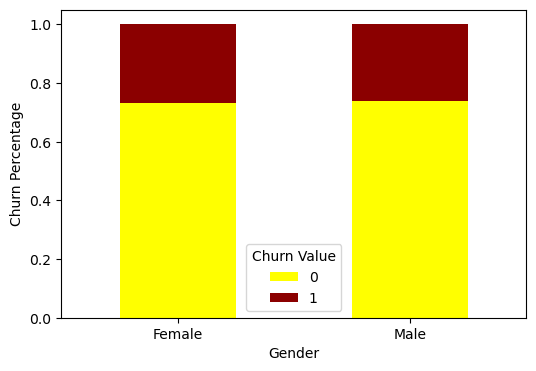

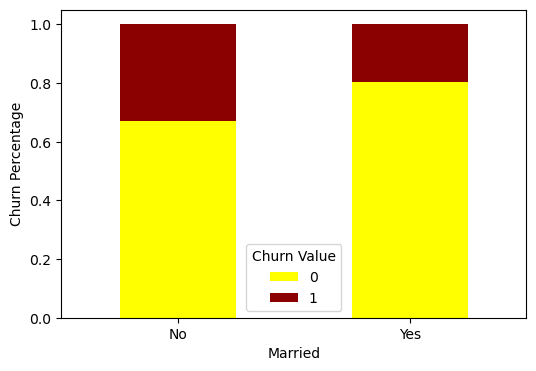

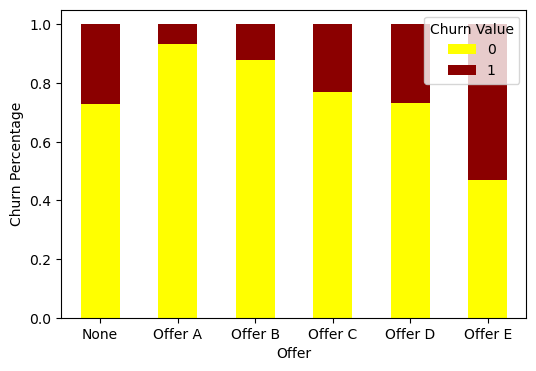

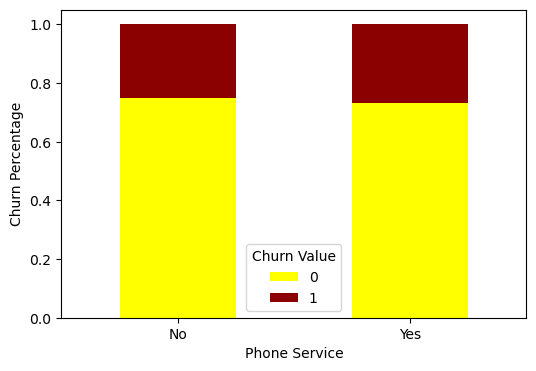

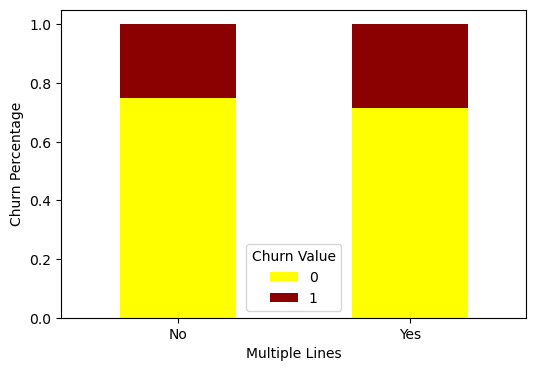

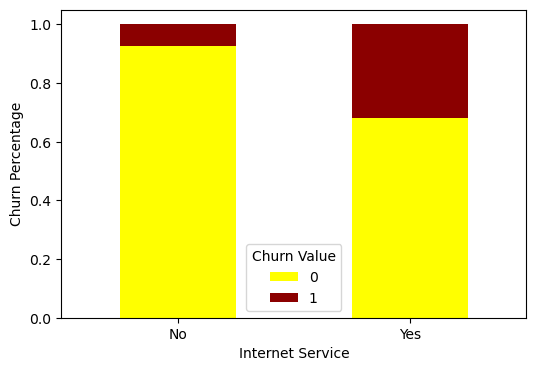

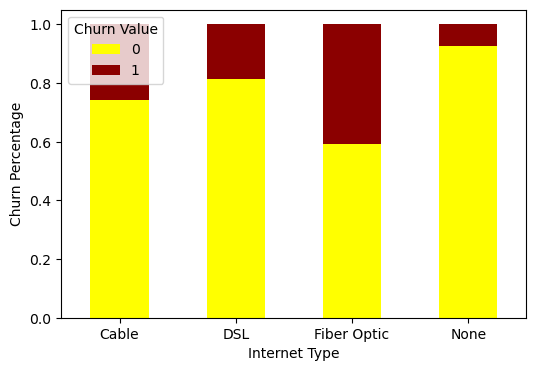

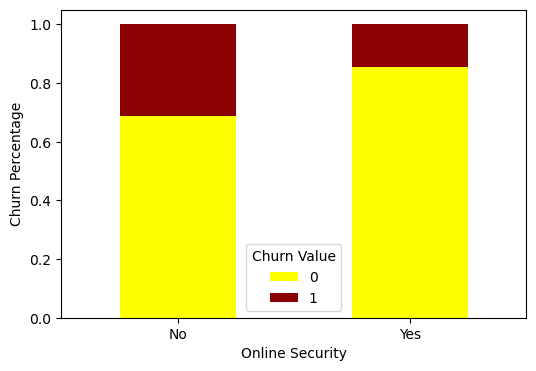

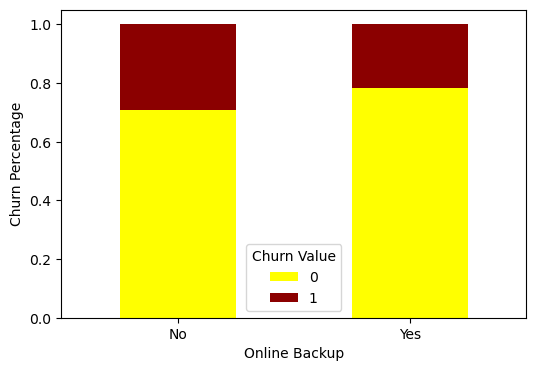

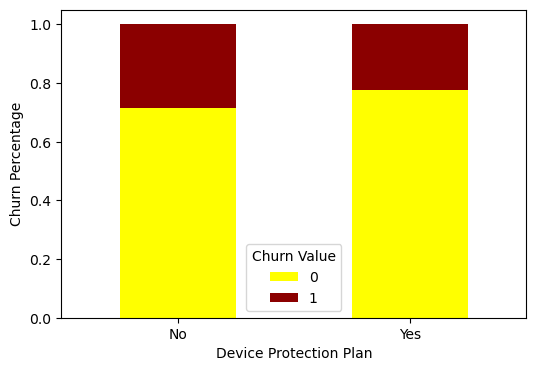

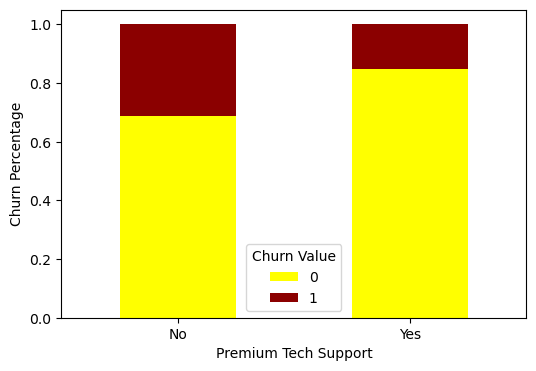

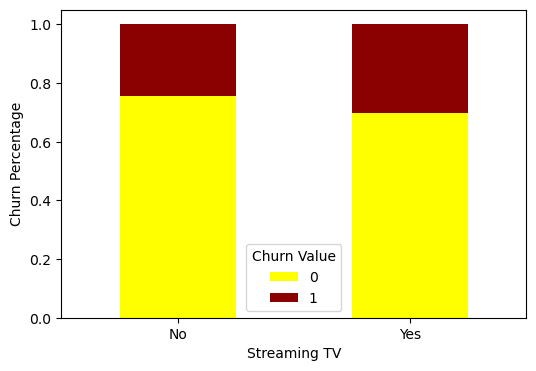

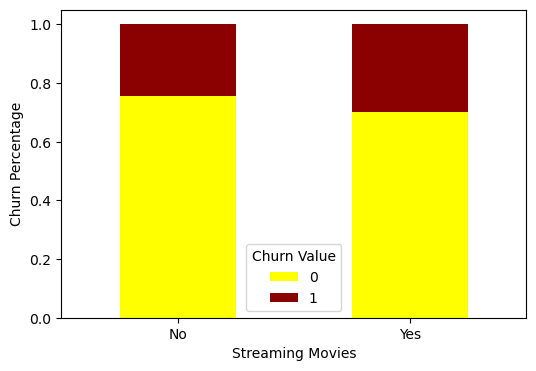

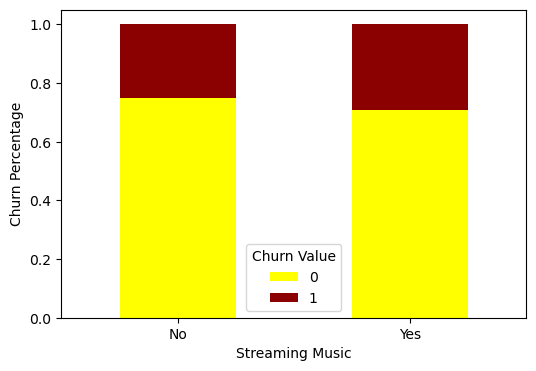

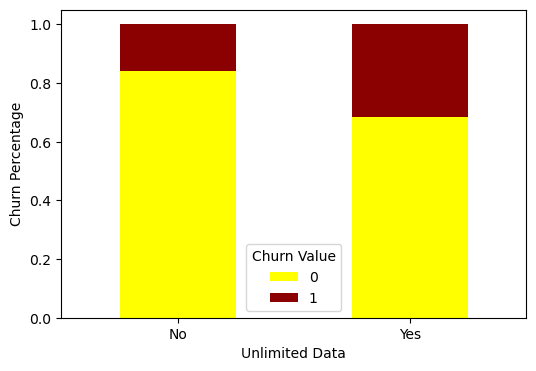

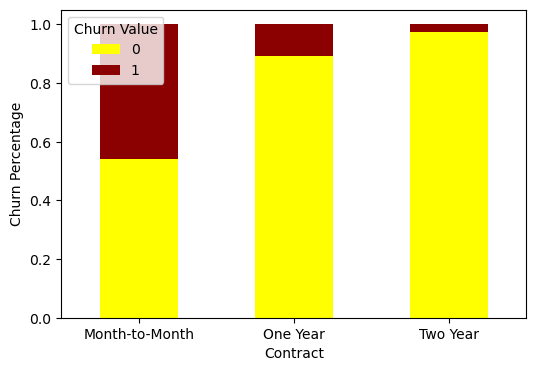

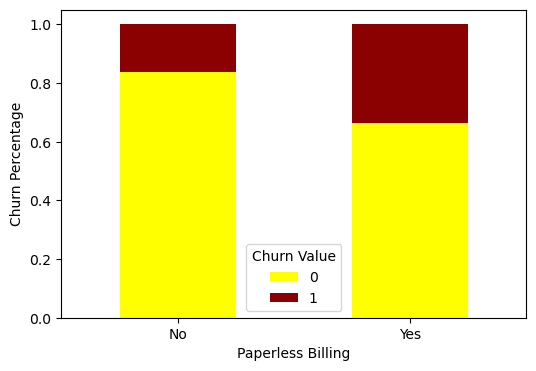

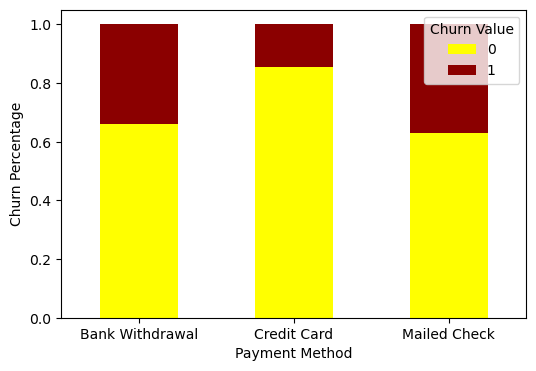

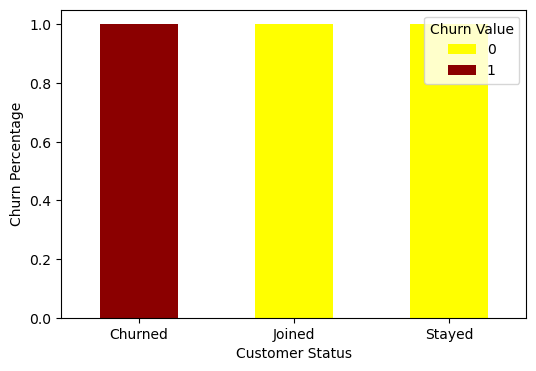

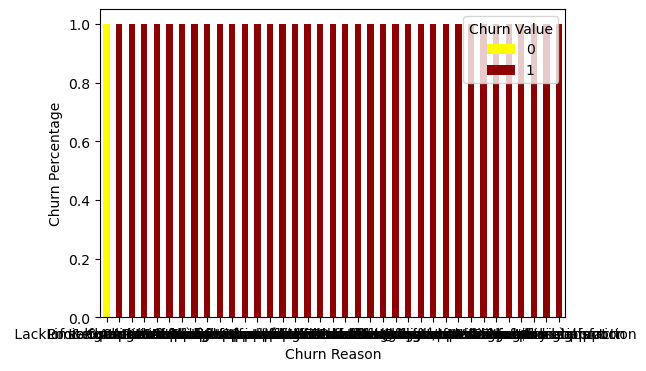

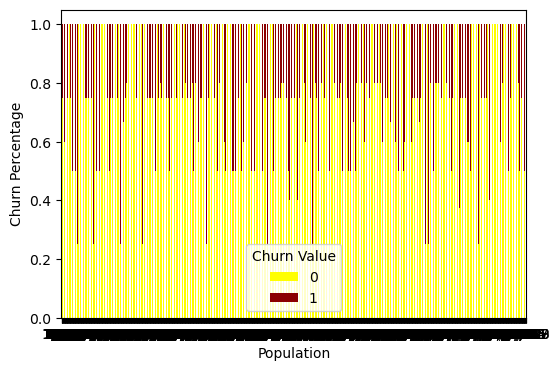

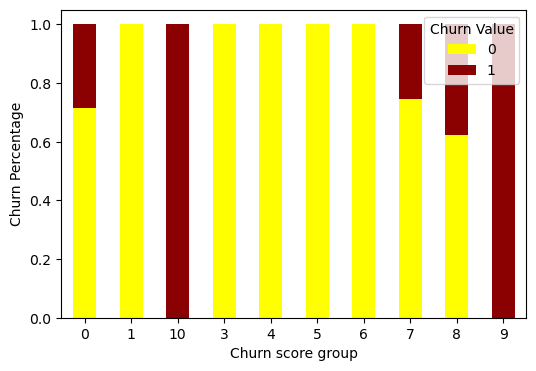

In [44]:


#Groups the DataFrame by both group and target columns and calculates the size (count) of each group-target combination.
#Groups the DataFrame by the group column and counts the number of occurrences of each group.
#calculates the proportion of each target value within each group.
#Converts the groupby object back to a DataFrame.
#Pivots the DataFrame to have the target values as columns, group values as rows, and the calculated proportions as values.

def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["yellow", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')
    
for i in cat_features:
    stacked_plot(data, i , 'Churn Value')
    

### b) Multivariate Analysis : Plotting each categorical variable with 'Churn Value' (Grouped by another categorical variable)

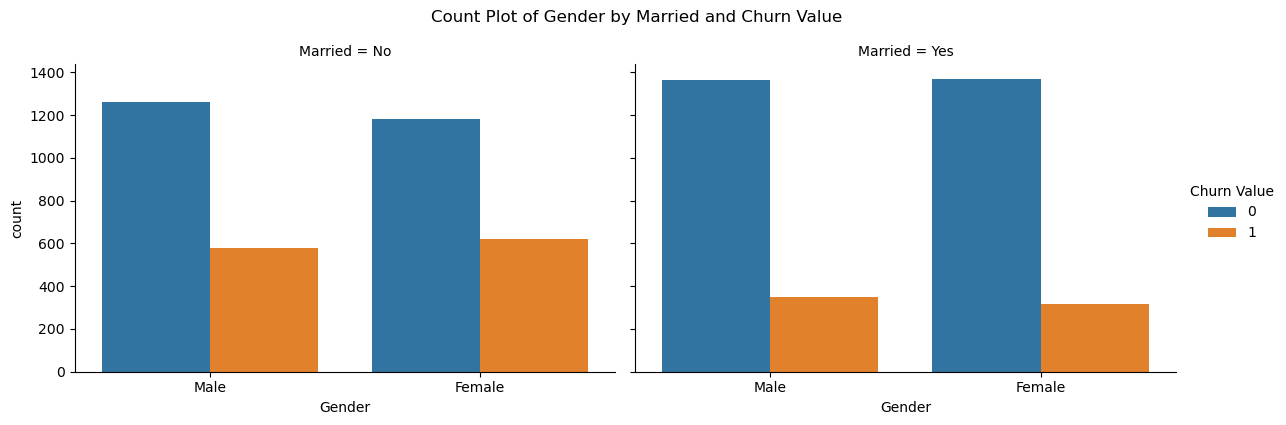

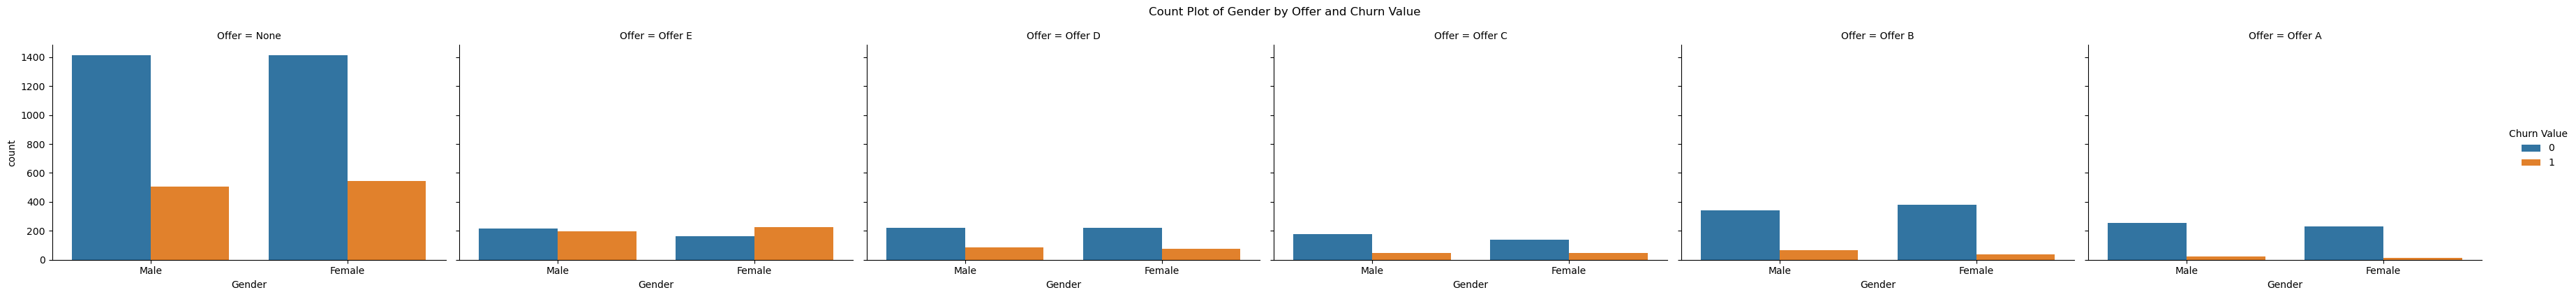

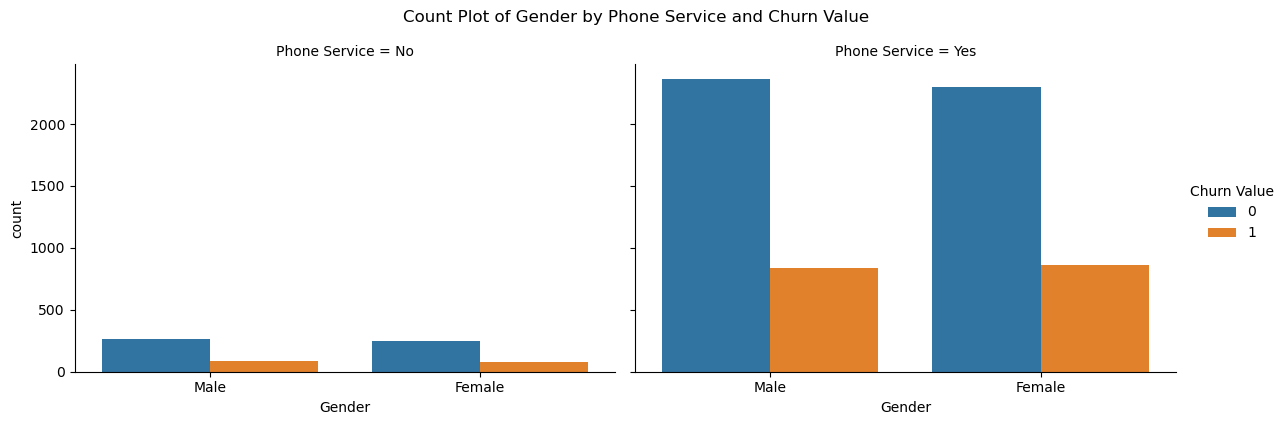

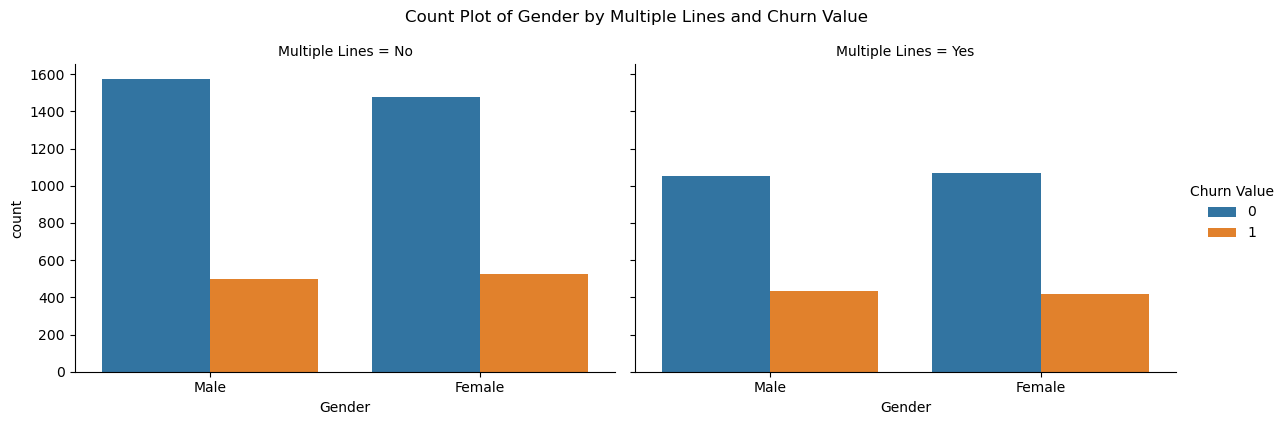

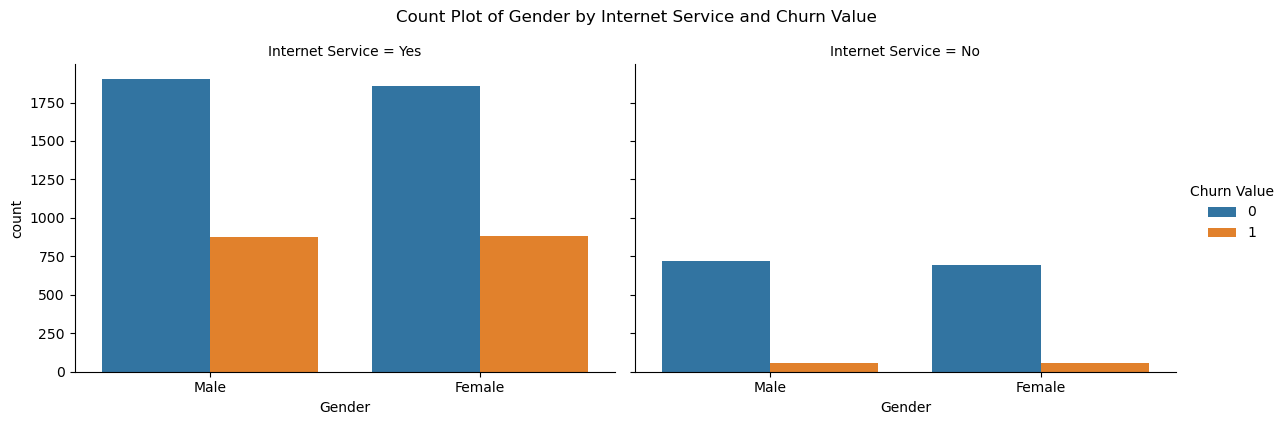

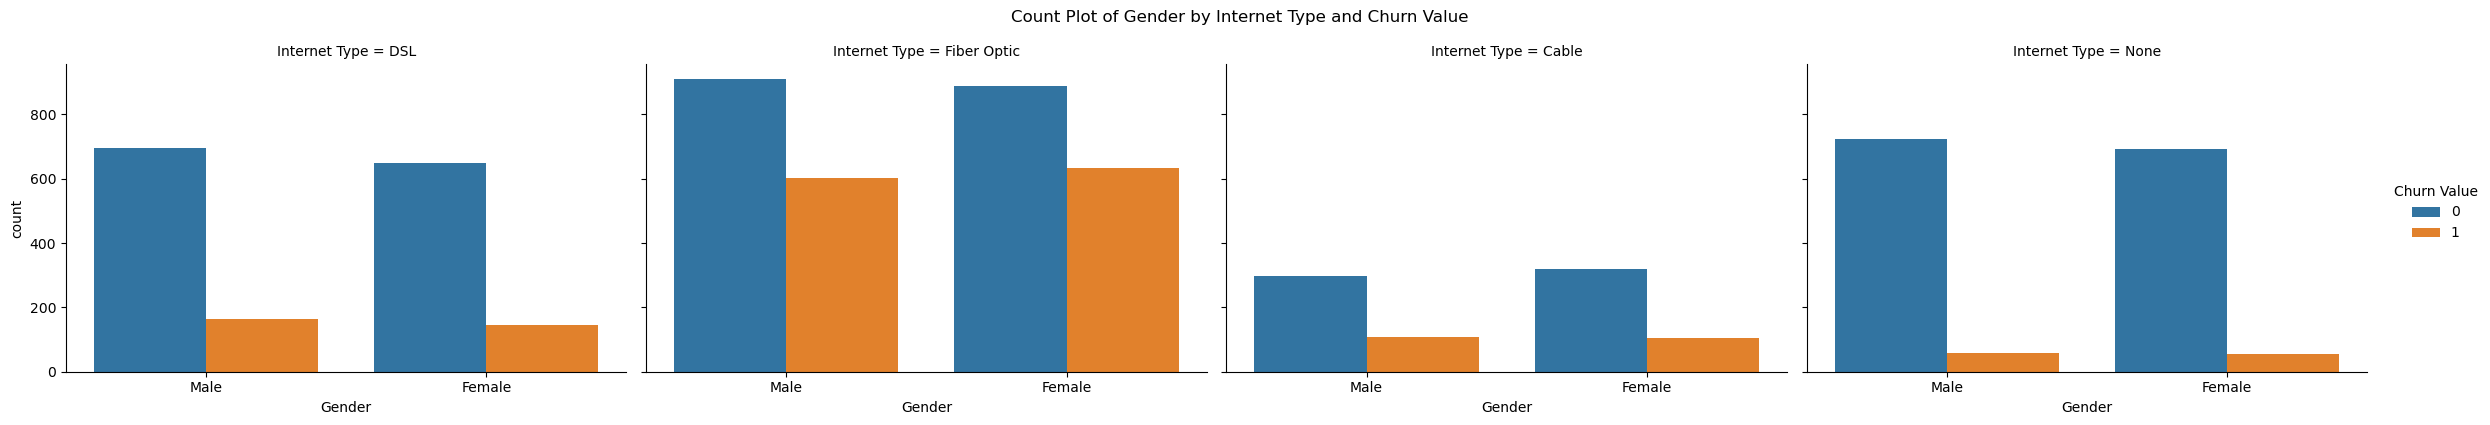

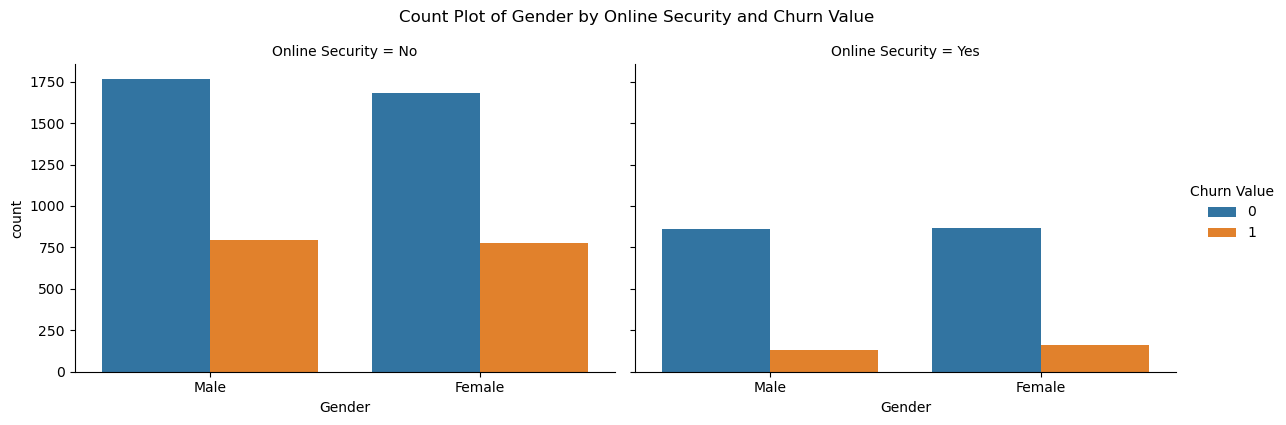

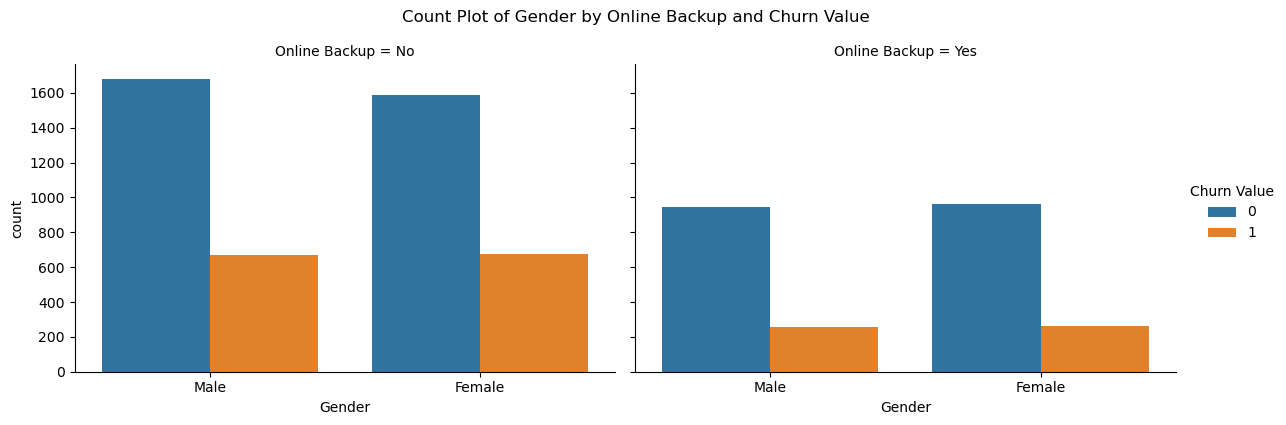

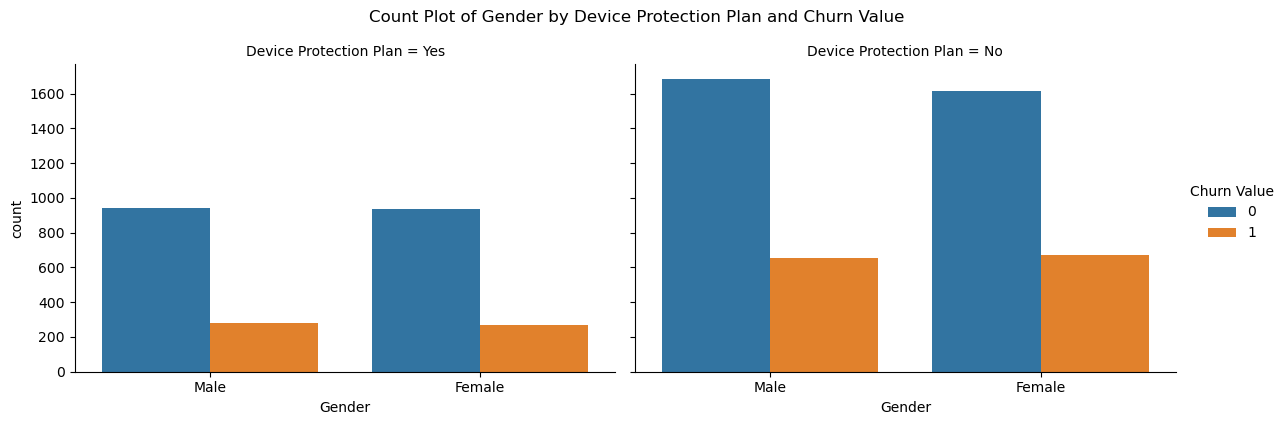

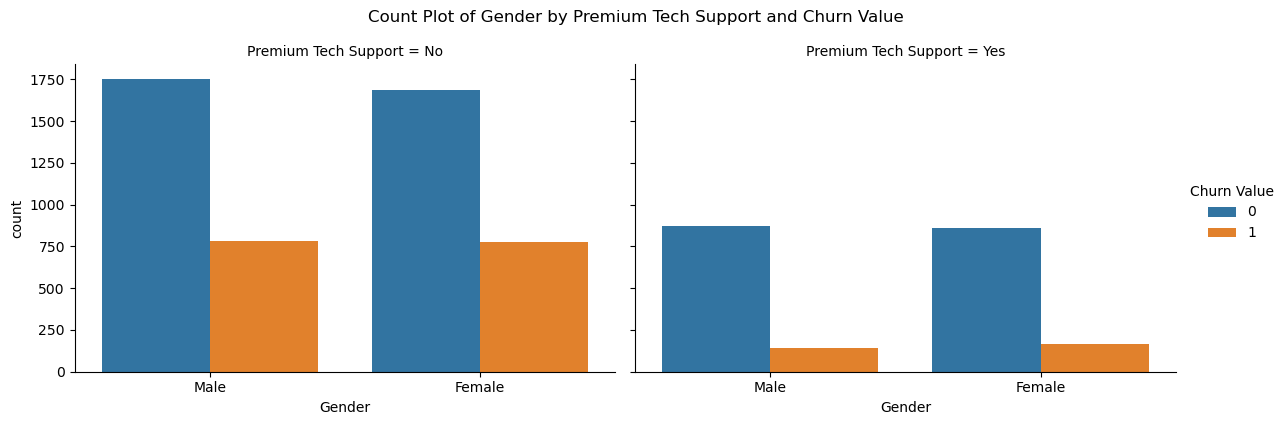

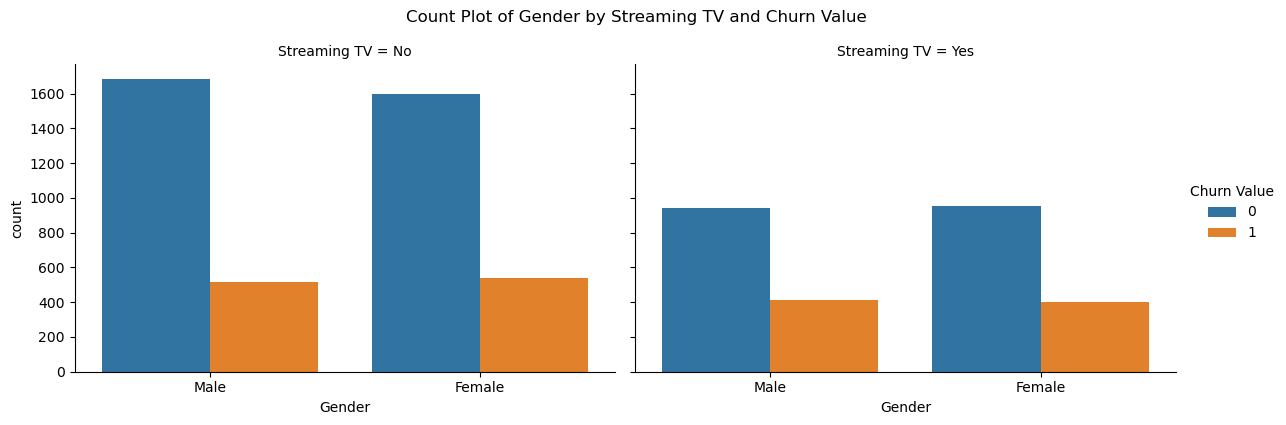

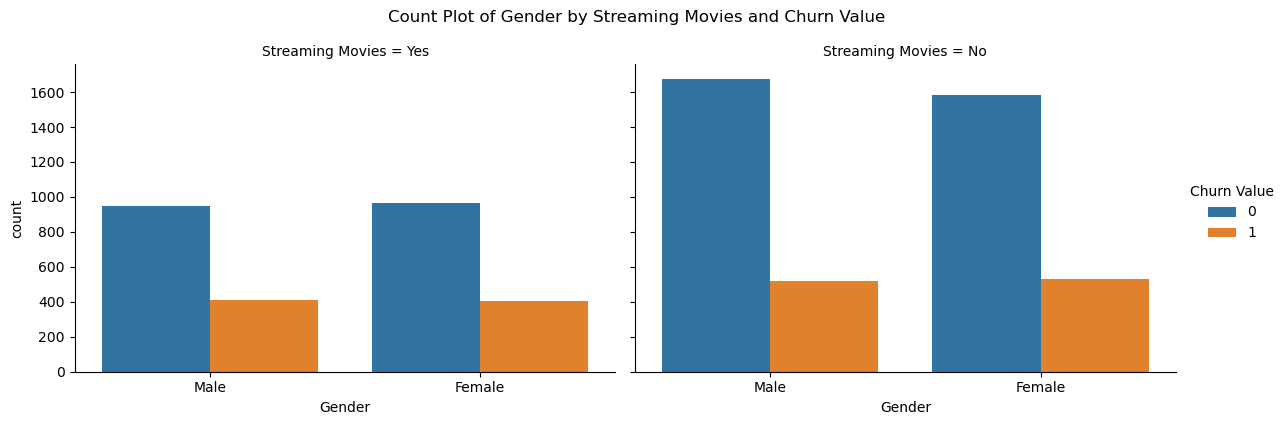

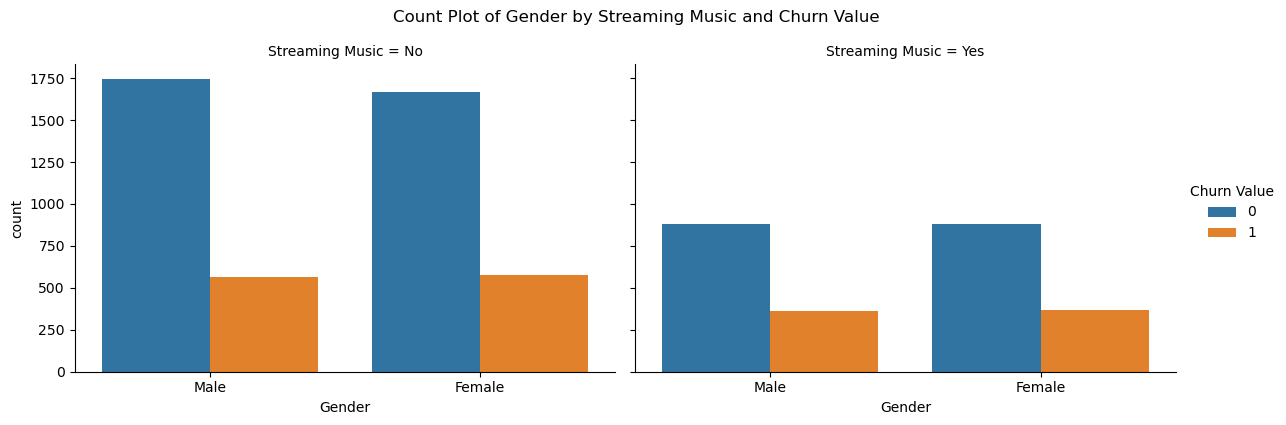

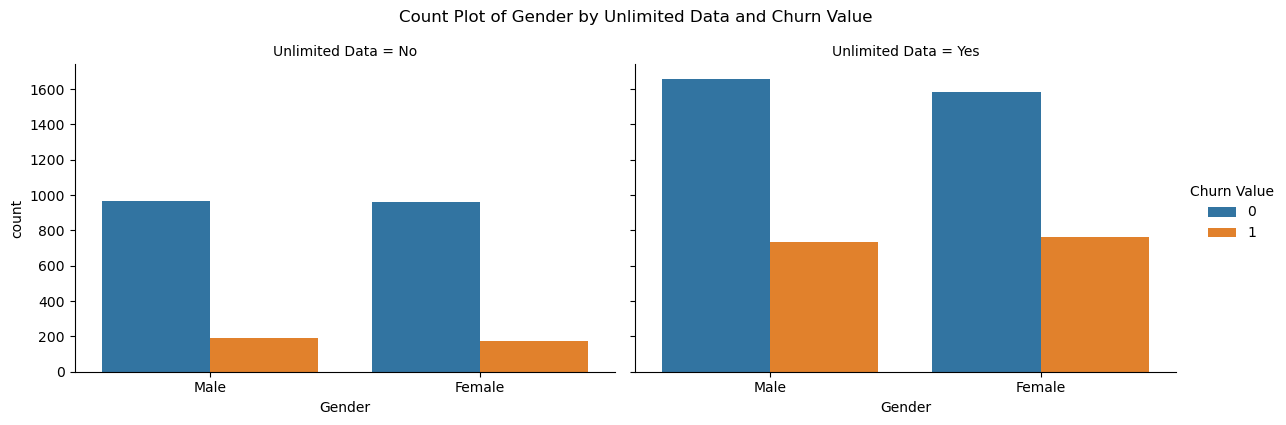

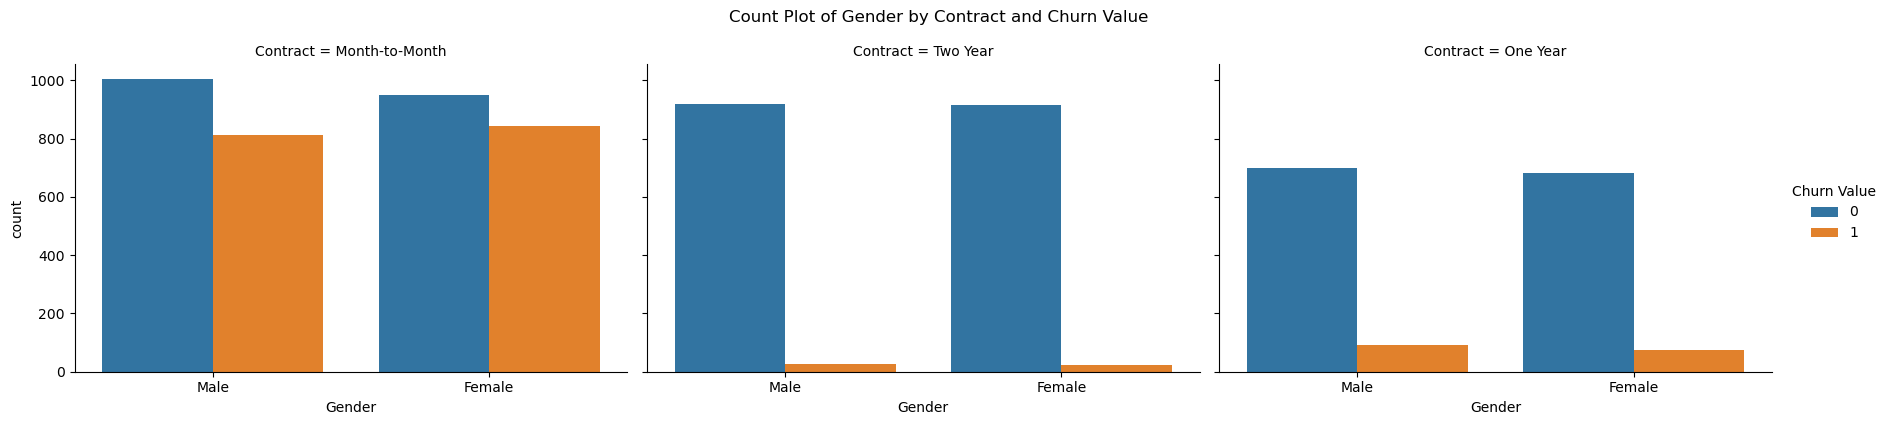

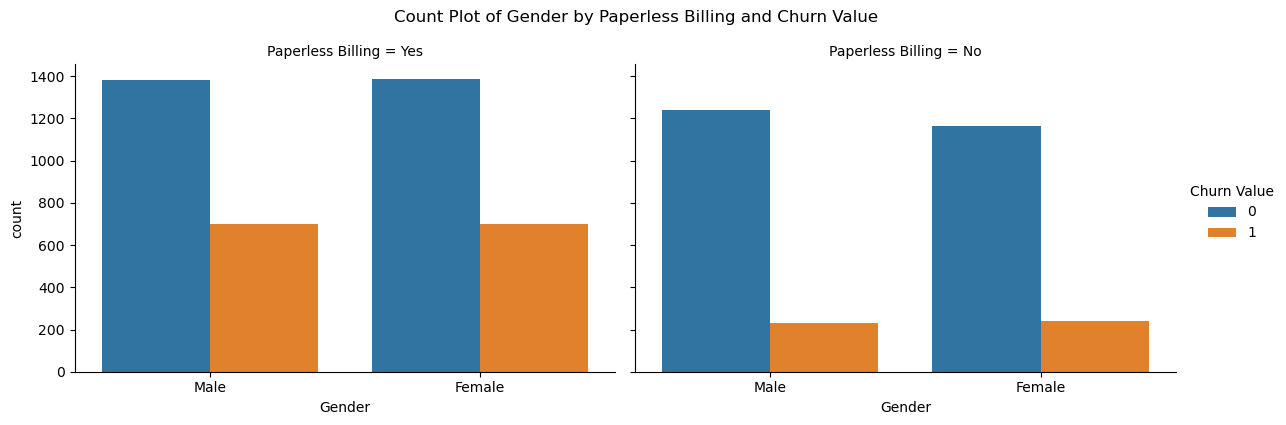

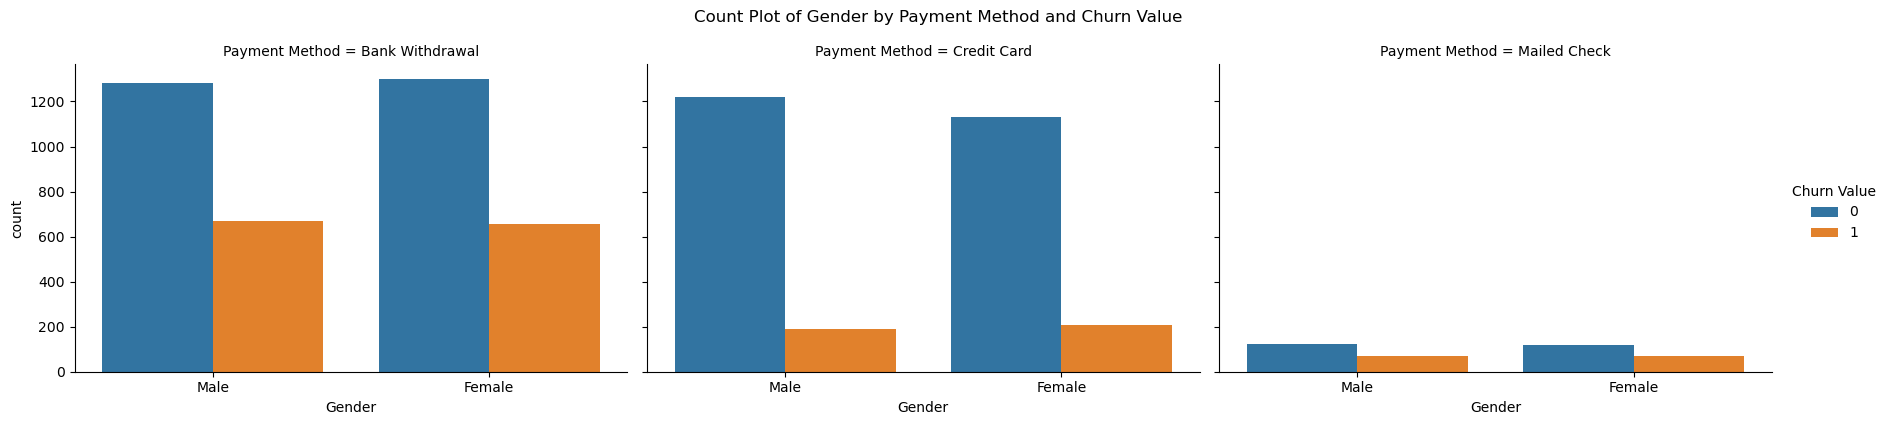

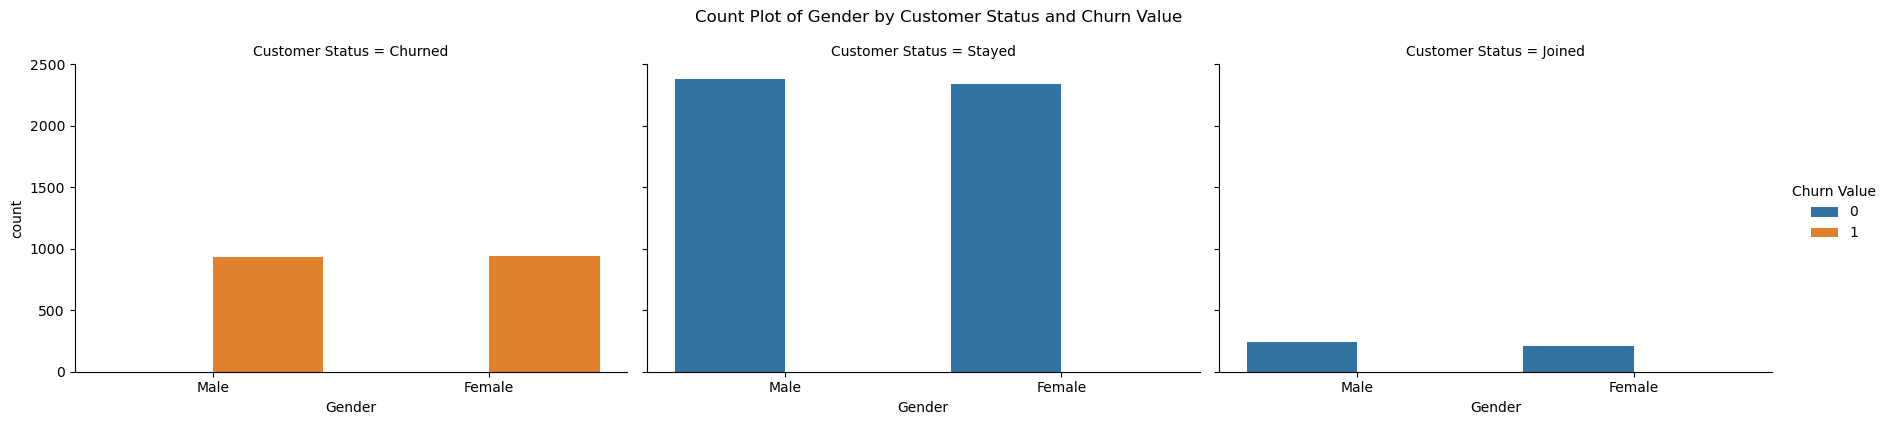

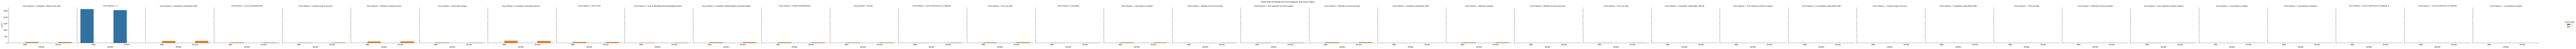

ValueError: Image size of 941400x400 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x00000269529E8220> (for post_execute):


ValueError: Image size of 941400x400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 941400x400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 941400x400 with 1569 Axes>

In [45]:
for i, feature1 in enumerate(cat_features):
    for feature2 in cat_features[i:]:  # Avoid redundant plots
        if feature1 != feature2:  # Skip same feature comparison
            g = sns.catplot(data=data, kind='count', x=feature1, col=feature2, hue='Churn Value', height=4, aspect=1.5)
            g.fig.suptitle(f'Count Plot of {feature1} by {feature2} and Churn Value', y=1.05)
            plt.show()

### c) Plotting continuous with 'Churn Value'

In [19]:
continuous_var = data.select_dtypes(include=['int','float']).columns
continuous_var = continuous_var.drop(['Zip Code', 'Latitude', 'Longitude','Churn Value'])
print(continuous_var)

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Churn Score', 'CLTV', 'Tenure Years', 'Age group'],
      dtype='object')


<Axes: xlabel='CLTV', ylabel='Count'>

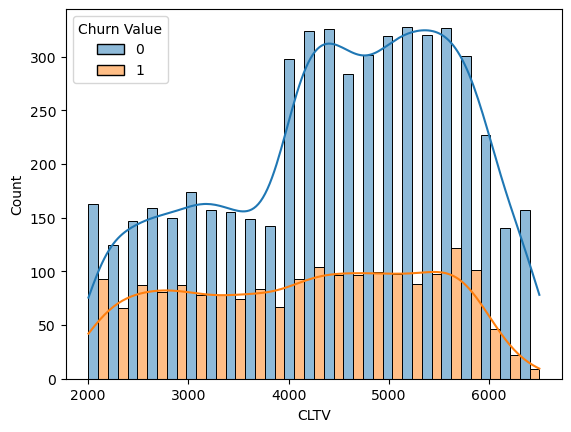

In [20]:
sns.histplot(data=data, x='CLTV', hue='Churn Value', multiple='dodge', kde=True)

## OBV : Customers with high CLTV are valuable customers .In CLTV range 4000-6500, customers are staying than churning. 

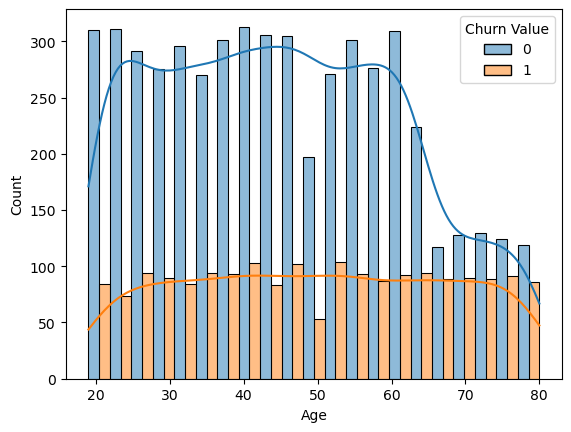

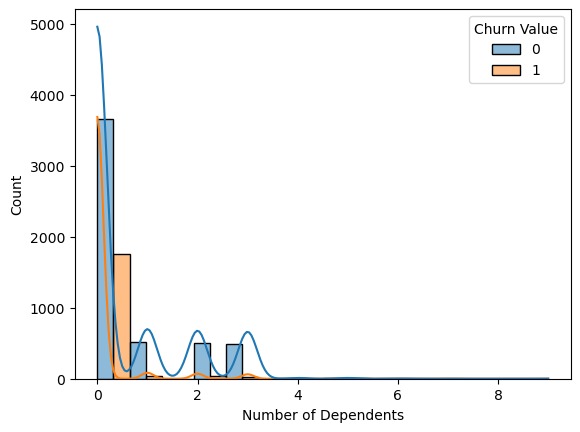

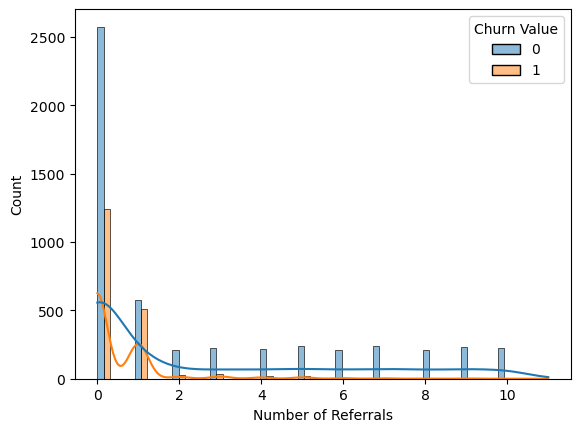

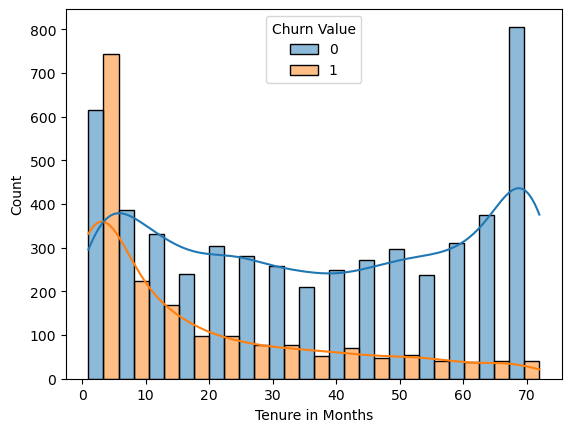

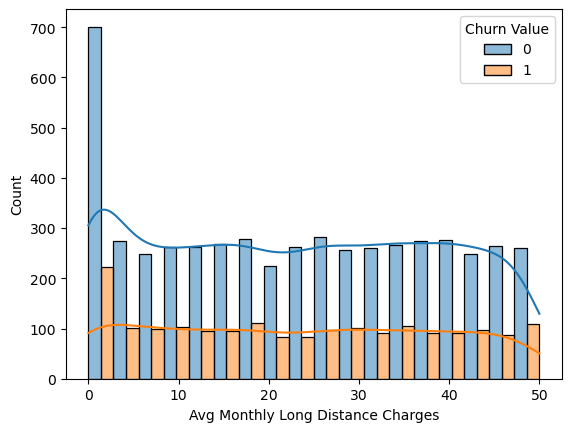

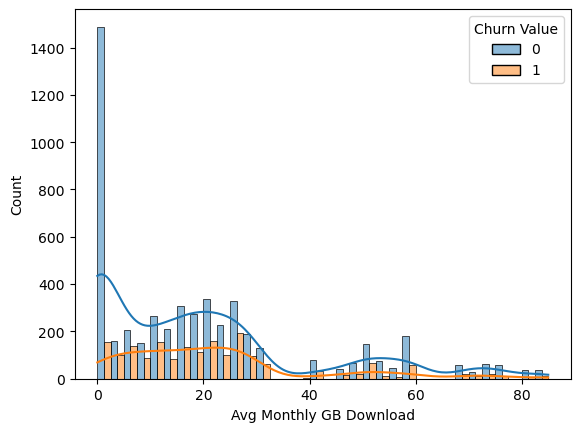

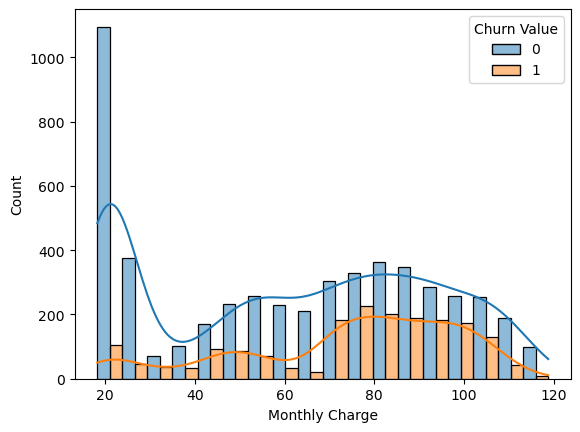

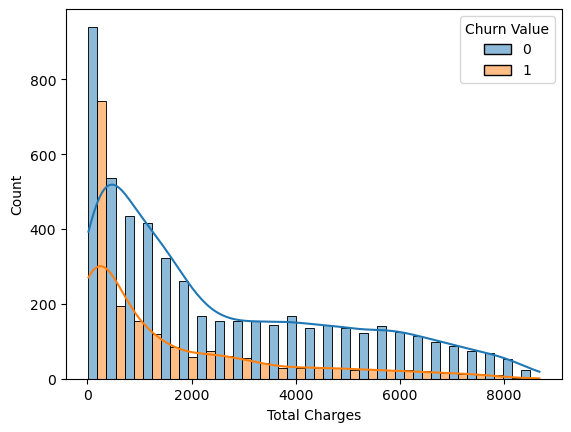

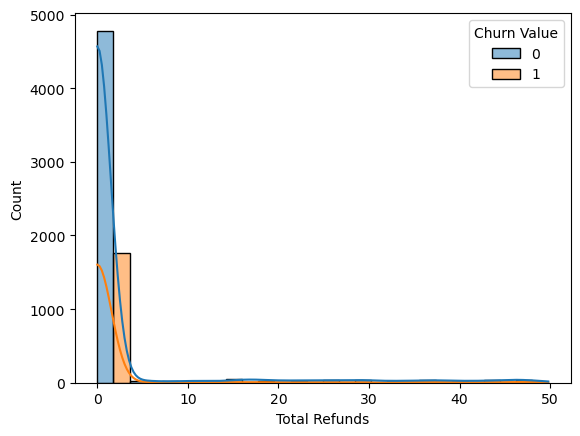

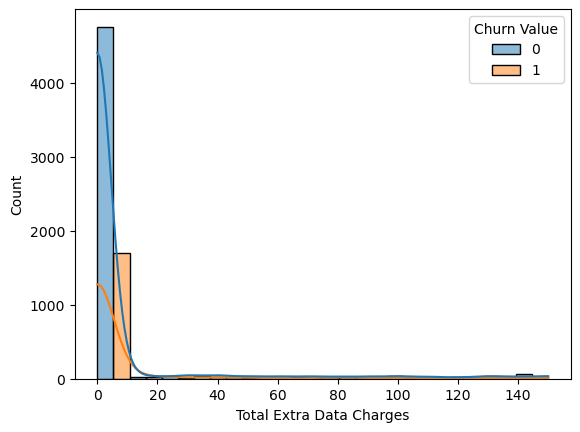

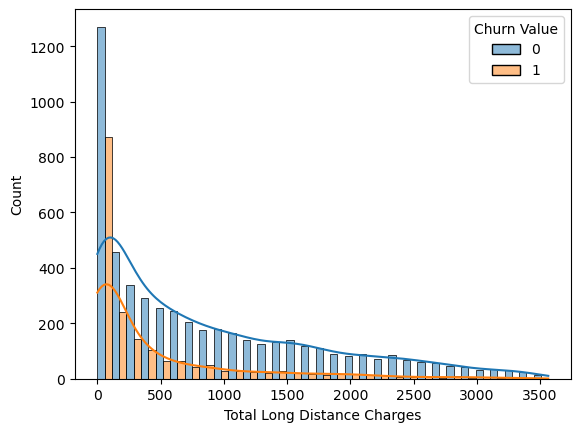

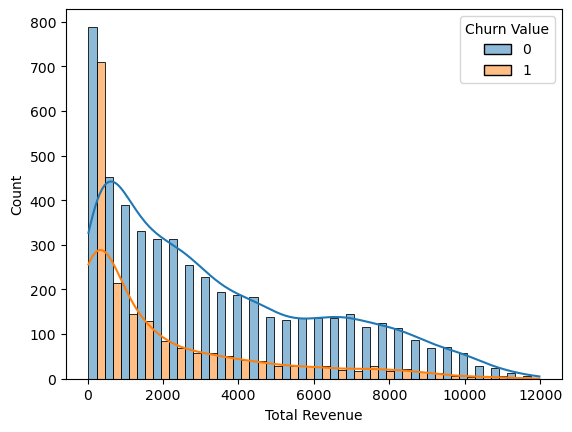

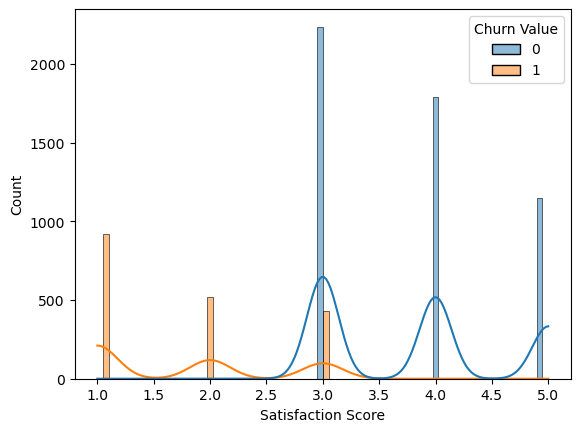

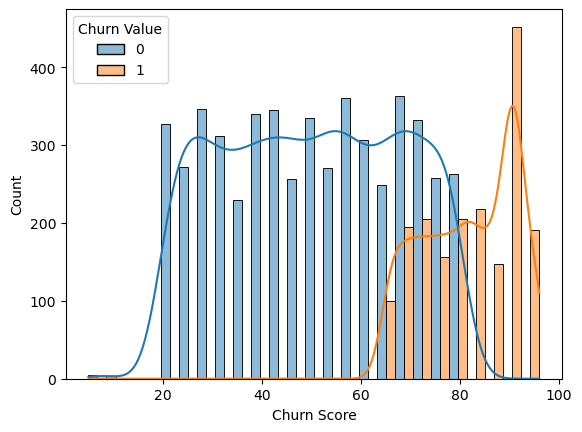

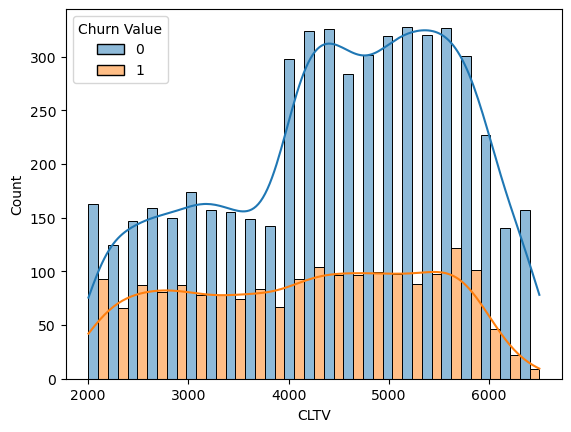

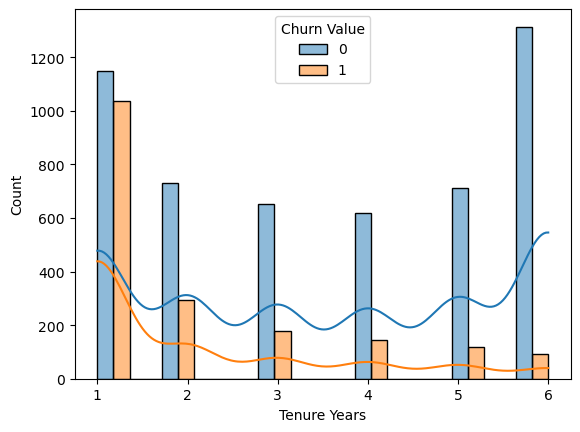

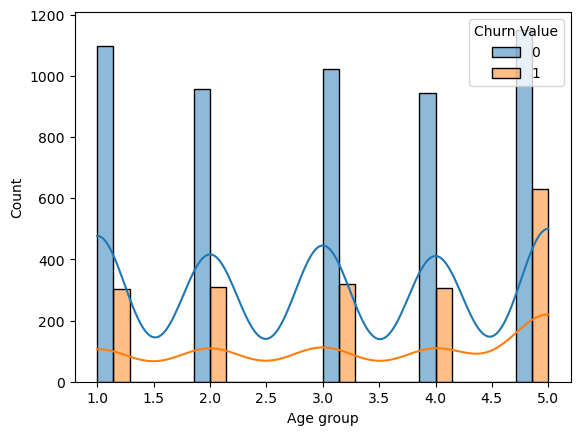

In [48]:
for i in continuous_var:
    sns.histplot(data=data, x=i, hue='Churn Value', multiple='dodge', kde=True)
    plt.show()

### d)Plotting 'City' in pie diagram to view TOP 10 cities to churn

([<matplotlib.patches.Wedge at 0x1c0b8012b90>,
 [Text(0.7767724548666737, 0.7788610616537468, 'los angeles'),
  Text(-0.7641242824124516, 0.7912737080351249, 'san diego'),
  Text(-1.0621351940743995, -0.286127295986486, 'san jose'),
  Text(-0.7227787554868363, -0.8292109928220321, 'sacramento'),
  Text(-0.16185988100204485, -1.0880263686703573, 'san francisco'),
  Text(0.32019644018027904, -1.0523660198314448, 'fresno'),
  Text(0.6393743812009299, -0.895097983834132, 'long beach'),
  Text(0.8758257264624953, -0.6655293358421118, 'oakland'),
  Text(1.0242691923367562, -0.40108929383593533, 'escondido'),
  Text(1.0923318664520107, -0.12965760114033756, 'stockton')],
 [Text(0.4236940662909129, 0.42483330635658917, '25.04%'),
  Text(-0.41679506313406445, 0.4316038407464317, '24.36%'),
  Text(-0.5793464694951269, -0.15606943417444688, '9.57%'),
  Text(-0.3942429575382744, -0.45229690517565385, '9.23%'),
  Text(-0.08828720781929718, -0.5934689283656494, '8.89%'),
  Text(0.17465260373469763, 

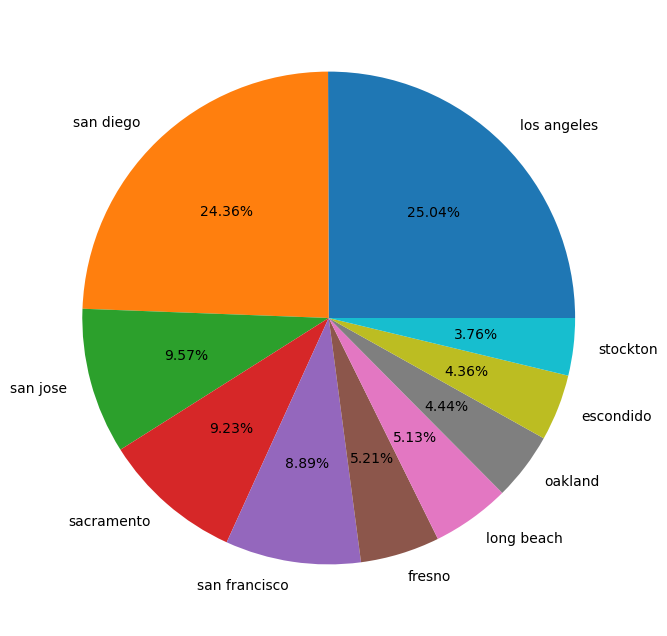

In [21]:
### CITY


city_values=data['City'].value_counts().values
city_names=data['City'].value_counts().index
plt.figure(figsize=(8, 8))  # Adjust the width and height as needed
plt.pie(city_values[:10],labels=city_names[:10],autopct="%1.2f%%")



([<matplotlib.patches.Wedge at 0x1c0bc4b4410>,
 [Text(0.27522836248433485, 1.0650114311518877, 'san diego'),
  Text(-1.0986326160705844, -0.05483041953062051, 'los angeles'),
  Text(-0.7453131563697027, -0.8090168718526403, 'san francisco'),
  Text(-0.34289843441107104, -1.0451892956199067, 'san jose'),
  Text(0.08220303386611232, -1.096924182076048, 'fallbrook'),
  Text(0.4737389647571077, -0.9927594841001843, 'sacramento'),
  Text(0.7792014386324093, -0.7764310130547233, 'temecula'),
  Text(0.9584505486217393, -0.5397893532172409, 'escondido'),
  Text(1.05341313408304, -0.3167345401773347, 'long beach'),
  Text(1.095286300497041, -0.10172472631325047, 'fresno')],
 [Text(0.15012456135509172, 0.5809153260828477, '41.95%'),
  Text(-0.5992541542203187, -0.02990750156215664, '17.69%'),
  Text(-0.4065344489289287, -0.44128193010144007, '7.03%'),
  Text(-0.187035509678766, -0.5701032521563126, '6.58%'),
  Text(0.04483801847242489, -0.5983222811323897, '5.90%'),
  Text(0.2584030716856951, -0

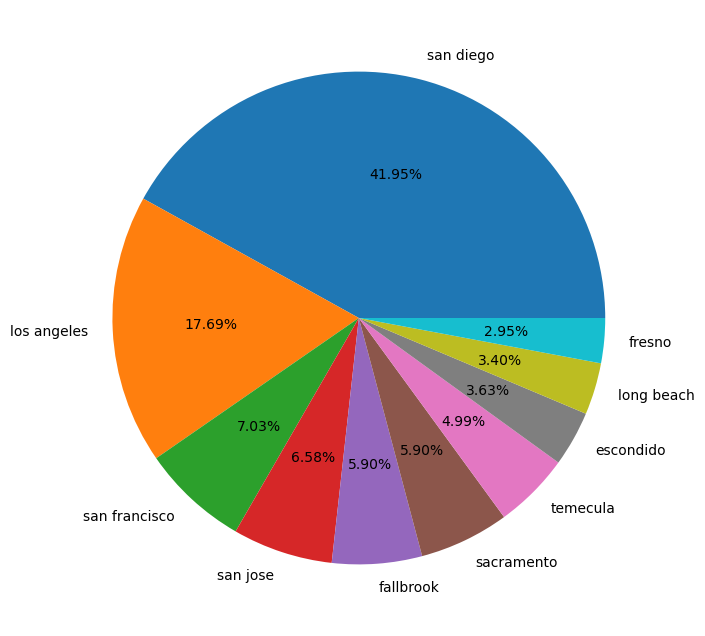

In [22]:
city_churn=pd.DataFrame(data[data['Churn Value']==1].City.value_counts())
city_values_1 = city_churn['City'].values
city_names_1 = city_churn['City'].index
plt.figure(figsize=(8, 8))  # Adjust the width and height as needed
plt.pie(city_values_1[:10],labels=city_names_1[:10],autopct="%1.2f%%")


## OBV :   Almost 42% of the churners are from SAN DIEGO , 18% from LOS ANGELES.(Top 2 cities with maximum churners)

### e) Payment Method of Churners Analysis:

	No Churn Customer's Payment Method :

 Bank Withdrawal    2580
Credit Card        2351
Mailed Check        243
Name: Payment Method, dtype: int64 

	Churn Customer's Payment Method : 

 Bank Withdrawal    1329
Credit Card         398
Mailed Check        142
Name: Payment Method, dtype: int64


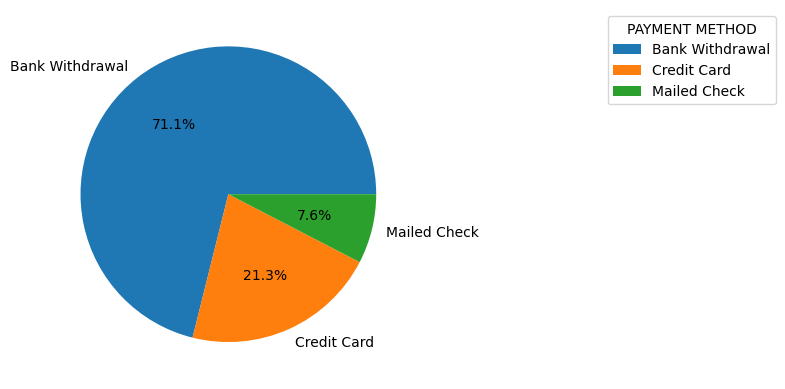

In [23]:
# forming groups of churners and non churners seperately  .

g = data.groupby('Churn Value')
g0 = g.get_group(0)
g1 = g.get_group(1)

# PAYMENT METHOD of the churners.

c_unique_pay_method = g1['Payment Method'].unique()
c_value_counts_pay_method = g1['Payment Method'].value_counts()

print("\tNo Churn Customer's Payment Method :\n\n",g0['Payment Method'].value_counts(),"\n")
print("\tChurn Customer's Payment Method : \n\n",g1['Payment Method'].value_counts())

plt.pie ( c_value_counts_pay_method , labels = c_unique_pay_method , autopct='%1.1f%%')
plt.legend(title = "PAYMENT METHOD", bbox_to_anchor=(2,1))
plt.show()


# OBV : 71.1% CHURNERS HAD MAILED CHECK PAYMENT METHOD

### f) Tech support of Churners

	No Churn Customer's Tech Support :

 No     3440
Yes    1734
Name: Premium Tech Support, dtype: int64 

	Churn Customer's Tech Support : 

 No     1559
Yes     310
Name: Premium Tech Support, dtype: int64


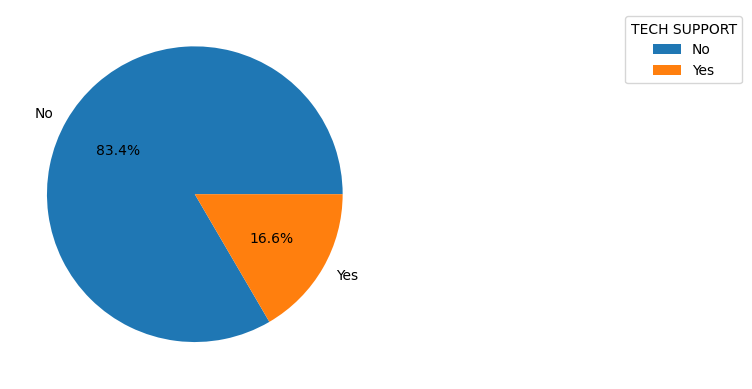

In [52]:
#  TECH SUPPORT of the churners.

c_unique_tech = g1['Premium Tech Support'].unique()
c_value_counts_tech = g1['Premium Tech Support'].value_counts()

print("\tNo Churn Customer's Tech Support :\n\n",g0['Premium Tech Support'].value_counts(),"\n")
print("\tChurn Customer's Tech Support : \n\n",g1['Premium Tech Support'].value_counts())

plt.pie ( c_value_counts_tech , labels = c_unique_tech , autopct='%1.1f%%')
plt.legend(title = "TECH SUPPORT", bbox_to_anchor=(2,1))
plt.show()


# OBV :  83.4% CHURNERS HAD NO TECH SUPPORT


### g) Churners contract type analysis

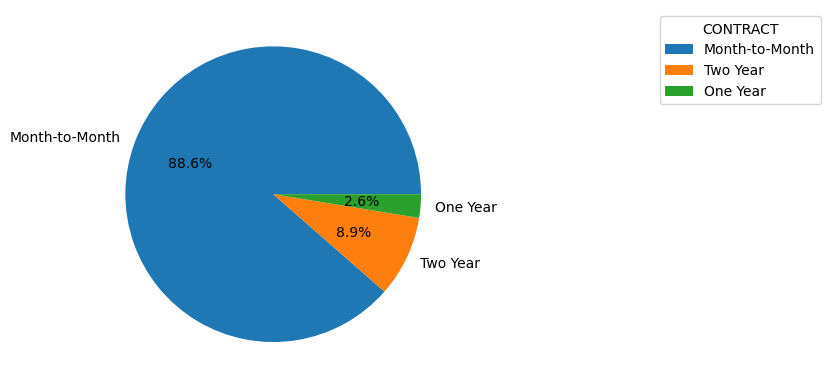

In [53]:
# A large no. of churner's contract was month-to-month .

c_unique_contract=g1['Contract'].unique()
c_value_counts_contract=g1['Contract'].value_counts()
plt.pie ( c_value_counts_contract , labels = c_unique_contract,autopct='%1.1f%%')
plt.legend(title = "CONTRACT", bbox_to_anchor=(2,1))
plt.show()


# OBV : 88.6% CHURNERS HAD MONTH-TO-MONTH CONTRACT


### h) CHURNERS PAPERLESS BILLING

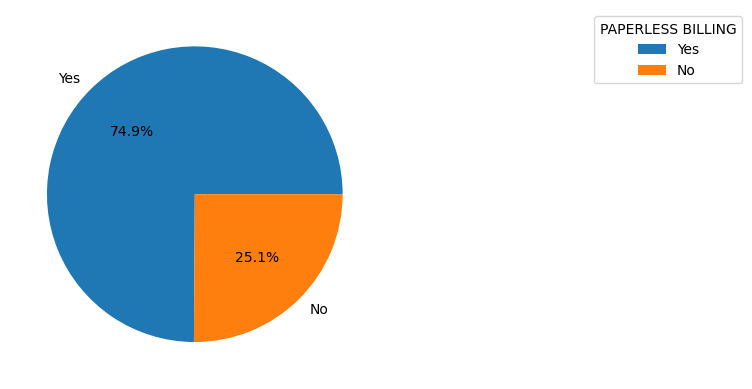

In [54]:
### CHURNERS PAPERLESS BILLING

c_unique_paperless_bill = g1['Paperless Billing'].unique()
c_value_counts_paperless_bill = g1['Paperless Billing'].value_counts()
plt.pie ( c_value_counts_paperless_bill , labels = c_unique_paperless_bill , autopct='%1.1f%%')
plt.legend(title = "PAPERLESS BILLING", bbox_to_anchor=(2,1))
plt.show()

# OBV : 74.9% CHURNERS HAD PAPERLESS BILLING

### j) High CLTV customers must be monitored. 

In [24]:
# High CLTV customers must be monitored. 

cltv_mean = data['CLTV'].mean()
cltv_max = data['CLTV'].max()
print("Mean CLTV is : ",cltv_mean)
print("Maximum CLTV is : ",cltv_max)
high_cltv_df = data[data['CLTV']>cltv_mean]
#high_cltv_df
high_cltv_churners = high_cltv_df[high_cltv_df['Churn Value']==1]
print("The no. of CHURNERS with a high CLTV IS : ",high_cltv_churners.shape[0])


Mean CLTV is :  4400.295754650007
Maximum CLTV is :  6500
The no. of CHURNERS with a high CLTV IS :  858


In [25]:
data

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Score,CLTV,Churn Reason,Population,Tenure Years,Age group,Churn score group
0,Male,78,No,0,los angeles,90022,34.023810,-118.156582,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20.0,0.00,59.65,3,Churned,1,91,5433,Competitor offered more data,"68,701",1,5,10
1,Male,39,Yes,0,los angeles,90022,34.023810,-118.156582,5,72,None,Yes,42.55,Yes,Yes,DSL,18,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,72.10,5016.65,0.0,0.0,3063.60,8080.25,3,Stayed,0,42,4658,0,"68,701",6,2,5
2,Female,32,No,0,los angeles,90022,34.023810,-118.156582,0,1,None,Yes,7.11,No,Yes,Fiber Optic,26,No,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,75.55,75.55,0.0,0.0,7.11,82.66,5,Joined,0,34,3503,0,"68,701",1,2,4
3,Male,35,Yes,3,los angeles,90022,34.023810,-118.156582,4,66,None,No,0.00,No,Yes,Cable,25,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,56.75,3708.40,0.0,0.0,0.00,3708.40,3,Stayed,0,46,5748,0,"68,701",6,2,5
4,Female,20,No,0,los angeles,90022,34.023810,-118.156582,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.0,0.0,255.43,888.88,3,Stayed,0,38,5545,0,"68,701",1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,21,Yes,0,jacumba,91934,32.649787,-116.223700,6,1,Offer E,Yes,16.06,No,Yes,DSL,59,Yes,Yes,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Credit Card,53.55,53.55,0.0,0.0,16.06,69.61,4,Joined,0,62,4504,0,699,1,1,7
7039,Male,36,Yes,0,san diego,92105,32.741859,-117.090353,1,67,None,Yes,23.13,Yes,Yes,Fiber Optic,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,109.90,7332.40,0.0,0.0,1549.71,8882.11,4,Stayed,0,26,5416,0,"73,006",6,2,3
7040,Male,32,Yes,3,san diego,92105,32.741859,-117.090353,8,9,Offer E,Yes,23.42,Yes,Yes,Fiber Optic,30,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,102.60,897.75,0.0,0.0,210.78,1108.53,5,Stayed,0,32,4062,0,"73,006",1,2,4
7041,Male,62,No,0,holtville,92250,32.811001,-115.152865,0,26,None,Yes,37.69,Yes,Yes,Fiber Optic,30,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,84.30,2281.60,0.0,0.0,979.94,3261.54,5,Stayed,0,66,5471,0,"8,062",3,5,7


In [59]:
data.to_csv('Data_ML_model.csv', index=False)

# 4. ENCODING :

In [64]:
data.drop(['City'],inplace=True,axis=1)

In [65]:
### X and Y  matrix

X=data.drop(['Customer Status','Churn Value','Churn Category','Churn Reason'],axis=1)
Y=data['Churn Value']


In [66]:
## TRAIN - TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)
Y_train = pd.DataFrame(Y_train,columns=['Churn Value'])

In [67]:

## BALANCING THE DATA (since no. of churner datapoints is much less than the no. of non-churners)

print("The no. of datapoints of CHURNED class is : ",data[data['Churn Value']==1].shape[0])
print("The no. of datapoints of NON-CHURNED class is : ",data[data['Churn Value']==0].shape[0])

# Oversampling the minority class

X_minority = X_train[data['Churn Value']==1]
X_majority = X_train[data['Churn Value']==0]
Y_minority = Y_train[data['Churn Value']==1]
Y_majority = Y_train[data['Churn Value']==0]
minority_lis = X_minority.index.to_list()
majority_lis = X_majority.index.to_list()

lis1 = []
lis2 = []

for i in range(5):
    oversampled_minority_indices = np.random.choice( minority_lis , size= len(majority_lis)//5, replace=True)
    X_train_minority = X_train.loc[oversampled_minority_indices]
    Y_train_minority = Y_train.loc[oversampled_minority_indices]
    lis1.append(X_train_minority)
    lis2.append(Y_train_minority)

X_minor = np.vstack(lis1)
Y_minor = np.vstack(lis2)
X_minor_dataframe = pd.DataFrame(X_minor)
Y_minor_dataframe = pd.DataFrame(Y_minor)

X_minor_dataframe.columns =X_majority.columns
Y_minor_dataframe.columns =Y_majority.columns
X_train = pd.concat([X_minor_dataframe, X_majority], axis=0, ignore_index=True)
Y_train = pd.concat([Y_minor_dataframe, Y_majority], axis=0, ignore_index=True)

The no. of datapoints of CHURNED class is :  1869
The no. of datapoints of NON-CHURNED class is :  5174


In [68]:
## ENCODING 

## ORDINAL CATEGORICAL VARIABLES

ordinal = ['Number of Dependents','Number of Referrals','Contract', 'Satisfaction Score']

## WE DEFINE 2 FUNCTIONs WHICH TAKES IN THE ORDINAL COLUMNS AND RETURNS ENCODED COLUMNS.

from sklearn.preprocessing import OrdinalEncoder

def encoding(X_train,X_test,col):
    labels = X_train[col].value_counts().index
    categories=[labels]
    ordinal_encoder = OrdinalEncoder(categories=categories)
    o = ordinal_encoder.fit(X_train[[col]])
    X_train[col] = o.transform(X_train[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])                    
    return list([pd.DataFrame(X_train[col],columns=[col]),pd.DataFrame(X_test[col],columns= [col])])


### applying the function


X_train['Contract'] = encoding(X_train,X_test,'Contract')[0]              
X_test['Contract'] = encoding(X_train,X_test,'Contract')[1]   

In [69]:
## NOMINAL ENCODING

## One HOt Encoding manually of the nominal features

nominal = ['Married','Offer','Multiple Lines','Internet Type','Online Security','Online Backup'
,'Premium Tech Support','Streaming TV','Paperless Billing','Payment Method','Phone Service','Gender',
          'Internet Service','Device Protection Plan','Streaming Movies','Streaming Music','Unlimited Data',
          ]

X_train1 = pd.get_dummies(X_train[nominal], prefix=nominal , drop_first =True)
X_train_copy = X_train          ## Copy of the X_train is saved.
x = X_train.drop(nominal,axis=1)   ## Dropped the nominal features
X_train = pd.concat([x, X_train1], axis=1) 


X_test1 = pd.get_dummies(X_test[nominal], prefix=nominal , drop_first =True)
X_test_copy = X_test          ## Copy of the X_test is saved.
x1 = X_test.drop(nominal ,axis=1)   ## Dropped the nominal features
X_test = pd.concat([x1, X_test1], axis=1) 



In [70]:
## CONTINUOUS VARIABLE ENCODING
continuous = ['Age','Avg Monthly Long Distance Charges','Tenure in Months','Population','Total Revenue','Zip Code'
              ,'Avg Monthly GB Download','citywise_customer_%','CLTV','Churn Score','Total Extra Data Charges'
              ,'Total Refunds','Total Charges','Latitude','Monthly Charge','Longitude','Avg Monthly GB Download']          
for i in continuous:
    X_test[i] = ((X_test[i]) - np.mean(X_train[i])) / (np.std(X_train[i]))   
    X_train[i] = ((X_train[i]) - np.mean(X_train[i])) / (np.std(X_train[i]))


In [72]:
Y_test = Y_test.to_frame()

#Y_test.to_csv('ytest.csv', index=False)
#X_train.to_csv('xtrain.csv',index=False)
#Y_train.to_csv('ytrain.csv', index=False)
#X_test.to_csv('Xtest.csv', index=False)

In [73]:
X_train['Contract'] = X_train['Contract'].astype(int)

# 4. FEATURE SELECTION

### A)    F TEST CLASSIFICATION TECHNIQUE FOR feature selection : 
* This method is based on F-test estimate the degree of linear dependency between two random variables.  for accurate estimation

In [80]:
## SelectKBest  &  f_classif

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

col1 = SelectKBest(score_func = f_classif, k=20)
col2 = col1.fit(X_train,Y_train)
scores = pd.DataFrame(col2.scores_ , columns=['Score']) 
column_names = pd.DataFrame(X_train.columns)
selected_feat1 = pd.concat([column_names , scores],axis=1)
selected_feat1.columns = ['Feature','Score']
df_2 = selected_feat1.nlargest(20,'Score')
df_2

,Feature,Score
16,Satisfaction Score,12210.246084
17,Churn Score,8752.893009
9,Contract,1683.794013
22,Churn score group,1520.013484
6,Tenure in Months,1333.104267
20,Tenure Years,1199.585311
5,Number of Referrals,1114.334686
32,Internet Type_Fiber Optic,698.726887
33,Internet Type_None,634.080674
43,Internet Service_Yes,634.080674


### B)  MUTUAL CLASS INFORMATION GAIN : 
* Mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

In [81]:
## Mutual Information Gain Classifier & SelectKBest for Feature selection

col3 = SelectKBest(score_func = mutual_info_classif, k=20)
col4 = col3.fit(X_train,Y_train)
scores = pd.DataFrame(col4.scores_ , columns=['Score']) 
column_names = pd.DataFrame(X_train.columns)
selected_feat2 = pd.concat([column_names , scores],axis=1)
selected_feat2.columns = ['Feature','Score']
df_1 = selected_feat2.nlargest(20,'Score')
df_1

,Feature,Score
16,Satisfaction Score,0.489666
17,Churn Score,0.457032
22,Churn score group,0.377337
15,Total Revenue,0.261067
11,Total Charges,0.260353
14,Total Long Distance Charges,0.245672
18,CLTV,0.206310
2,Zip Code,0.203526
3,Latitude,0.196815
7,Avg Monthly Long Distance Charges,0.193622


### c)  TREE-BASED FEATURE SELECTION  : 
* This method can be used to compute impurity-based feature importances

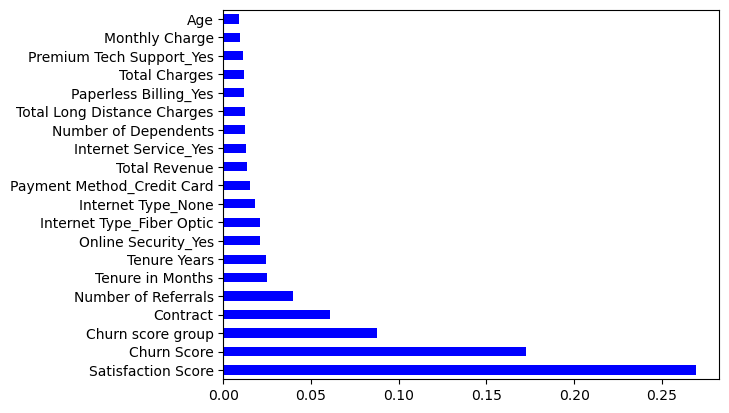

In [76]:
## ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
col3 = pd.Series(model.feature_importances_,index=X_train.columns)
col3.columns = ['Feature','Score']
col3.nlargest(20).plot(kind='barh',color='blue')
plt.show()

In [83]:
scores = pd.DataFrame(model.feature_importances_ , columns=['Score']) 
column_names = pd.DataFrame(X_train.columns)
selected_feat3 = pd.concat([column_names , scores],axis=1)
selected_feat3.columns = ['Feature','Score']

In [89]:
df3 = selected_feat3.nlargest(20,'Score')
df3

,Feature,Score
16,Satisfaction Score,0.269276
17,Churn Score,0.172708
22,Churn score group,0.087334
9,Contract,0.060704
5,Number of Referrals,0.039511
6,Tenure in Months,0.025102
20,Tenure Years,0.024414
34,Online Security_Yes,0.021105
32,Internet Type_Fiber Optic,0.020698
33,Internet Type_None,0.018221


### d)   FEATURES CORRELATED WITH EACH OTHER ARE IDENTIFIED

In [88]:
mat = X_train.corr()
feat1 = []
feat2 = []
co = []
for i in range(len(mat)):
    for j in range(len(mat)):
        if abs(mat.iloc[i,j])>0.7:
            feat1.append(mat.columns[i])
            feat2.append(mat.columns[j])
            co.append(mat.iloc[i,j])

co_df = pd.DataFrame({
    'Feature1': feat1,
    'Feature2': feat2,
    'Correlation': co
},index = range(len(feat1)))

co_df = co_df[co_df['Correlation']!=1.0]
feat_to_drop = co_df['Feature1'].value_counts().index
feat_to_drop = feat_to_drop.to_list()
print("We can either drop Feature1 or Feature2 from here :")
co_df

We can either drop Feature1 or Feature2 from here :


,Feature1,Feature2,Correlation
11,Internet Type_None,Internet Service_Yes,-1.000000
12,Internet Type_None,Unlimited Data_Yes,-0.724179
22,Internet Service_Yes,Internet Type_None,-1.000000
24,Internet Service_Yes,Unlimited Data_Yes,0.724179
27,Streaming Movies_Yes,Streaming Music_Yes,0.813742
28,Streaming Music_Yes,Streaming Movies_Yes,0.813742
30,Unlimited Data_Yes,Internet Type_None,-0.724179
31,Unlimited Data_Yes,Internet Service_Yes,0.724179


### e) Remove correlated features from df2['Feature'] .That is F TEST.

In [93]:

features_final_1 = [item for item in df_2['Feature'] if item not in co_df['Feature1']]
features_final_1


['Satisfaction Score',
 'Churn Score',
 'Contract',
 'Churn score group',
 'Tenure in Months',
 'Tenure Years',
 'Number of Referrals',
 'Internet Type_Fiber Optic',
 'Internet Type_None',
 'Internet Service_Yes',
 'Number of Dependents',
 'Total Long Distance Charges',
 'Payment Method_Credit Card',
 'Total Revenue',
 'Paperless Billing_Yes',
 'Total Charges',
 'Monthly Charge',
 'Online Security_Yes',
 'Unlimited Data_Yes',
 'Offer_Offer E']

## f) Remove correlated features from df_1['Feature'] . That is Information Gain.

In [95]:
features_final_2 = [item for item in df_1['Feature'] if item not in co_df['Feature1']]
features_final_2

['Satisfaction Score',
 'Churn Score',
 'Churn score group',
 'Total Revenue',
 'Total Charges',
 'Total Long Distance Charges',
 'CLTV',
 'Zip Code',
 'Latitude',
 'Avg Monthly Long Distance Charges',
 'Population',
 'Longitude',
 'Monthly Charge',
 'citywise_customer_%',
 'Contract',
 'Number of Referrals',
 'Tenure in Months',
 'Tenure Years',
 'Number of Dependents',
 'Internet Type_Fiber Optic']

## g) Remove correalted features from df3['Feature'] . That is ExtraTreesClassifier

In [97]:
features_final_3 = [item for item in df3['Feature'] if item not in co_df['Feature1']]
features_final_3

['Satisfaction Score',
 'Churn Score',
 'Churn score group',
 'Contract',
 'Number of Referrals',
 'Tenure in Months',
 'Tenure Years',
 'Online Security_Yes',
 'Internet Type_Fiber Optic',
 'Internet Type_None',
 'Payment Method_Credit Card',
 'Total Revenue',
 'Internet Service_Yes',
 'Number of Dependents',
 'Total Long Distance Charges',
 'Paperless Billing_Yes',
 'Total Charges',
 'Premium Tech Support_Yes',
 'Monthly Charge',
 'Age']

# STATISTICAL MACHINE LEARNING MODEL BUILDING

## [A] MODELS BASED ON  features_final_1 : ____________________________________

In [169]:
features_final_1 = [item for item in df_2['Feature'] if item not in co_df['Feature1']]
features_final_1.remove('Satisfaction Score')
features_final_1.remove('Churn Score')
features_final_1

['Contract',
 'Churn score group',
 'Tenure in Months',
 'Tenure Years',
 'Number of Referrals',
 'Internet Type_Fiber Optic',
 'Internet Type_None',
 'Internet Service_Yes',
 'Number of Dependents',
 'Total Long Distance Charges',
 'Payment Method_Credit Card',
 'Total Revenue',
 'Paperless Billing_Yes',
 'Total Charges',
 'Monthly Charge',
 'Online Security_Yes',
 'Unlimited Data_Yes',
 'Offer_Offer E']

In [170]:
X_train1 = X_train[features_final_1]
X_test1 = X_test[features_final_1]
X_train1

,Contract,Churn score group,Tenure in Months,Tenure Years,Number of Referrals,Internet Type_Fiber Optic,Internet Type_None,Internet Service_Yes,Number of Dependents,Total Long Distance Charges,Payment Method_Credit Card,Total Revenue,Paperless Billing_Yes,Total Charges,Monthly Charge,Online Security_Yes,Unlimited Data_Yes,Offer_Offer E
0,0,9,-1.12826,1,0,1,0,1,0,31.13,0,-0.944217,1,-0.914536,0.056878,0,1,0
1,0,10,-0.919693,1,0,0,0,1,0,103.08,0,-0.803142,0,-0.767824,-0.412108,1,1,1
2,0,8,-1.12826,1,0,0,0,1,1,39.6,0,-0.948283,1,-0.923606,-0.634351,0,1,0
3,2,8,-0.419132,2,0,0,0,1,0,225.0,1,-0.38566,1,-0.291865,0.489114,0,1,0
4,0,0,0.039715,3,0,1,0,1,0,1285.57,0,0.342158,1,0.148431,0.380618,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0,5,-0.877979,1,0,0,1,0,3,348.81,0,-0.79185,1,-0.86629,-1.672069,0,0,1
6947,2,8,1.791677,6,8,1,0,1,0,1928.36,0,2.581147,1,2.70612,1.57933,0,1,0
6948,1,8,0.248282,3,2,1,0,1,0,441.32,1,0.05343,0,0.168272,0.123376,0,1,0
6949,1,4,1.374543,6,0,0,1,0,0,2852.36,1,0.518263,0,-0.346747,-1.661569,0,0,0


### 1. LOGISTIC REGRESSION MODEL

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, fbeta_score,recall_score , roc_auc_score,confusion_matrix, 


# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p
dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}
param_grid = {
 'C': np.logspace(-3, 3, 7), # Regularization parameter
 'penalty': ['l1', 'l2'], # Penalty term
    'solver': ['liblinear'] # Solver for optimization problem
}
scoring = {
 'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average='macro'),
 'f_beta': make_scorer(fbeta_score, beta=2, average='macro')
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring=scoring, refit='accuracy',cv=6)
grid_search.fit(X_train1, Y_train)
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
print("Best Parameters:", best_params)


Best Parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [173]:
Y_pred = best_log_reg.predict(X_test1)
accuracy_log = accuracy_score(Y_test, Y_pred)
precision_log = precision_score(Y_test, Y_pred, average='macro')
fbeta_log = fbeta_score(Y_test, Y_pred, beta=2, average='macro')
Logistic_reg = [accuracy_log , precision_log , fbeta_log ]
print("Accuracy on Test Set:", accuracy_log)
print("Precision on Test Set:", precision_log)
print("F-beta Score on Test Set:", fbeta_log)


Accuracy on Test Set: 0.8189247311827957
Precision on Test Set: 0.7781211974294623
F-beta Score on Test Set: 0.8113465587624127


### 2. DECISION TREE MODEL

In [174]:

dt1 = DecisionTreeClassifier()
# Decision Tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV
dt1_grid_search = GridSearchCV(DecisionTreeClassifier(), dt1_param_grid,scoring=scoring, cv=5)
dt1_grid_search.fit(X_train1, Y_train)
dt1_best_params = dt1_grid_search.best_params_
dt1_best_classifier = dt1_grid_search.best_estimator_
print("THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS:",dt1_best_params)



THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS: {'max_depth': 40}


In [175]:
dt1_best_pred = dt1_best_classifier.predict(X_test1)
accuracy_dt = accuracy_score(Y_test, dt1_best_pred)
precision_dt = precision_score(Y_test, dt1_best_pred, average='macro')
fbeta_dt = fbeta_score(Y_test,dt1_best_pred, beta=2, average='macro')
Decision_tree = [accuracy_dt , precision_dt , fbeta_dt ]

print("Best Decision Tree Accuracy:", accuracy_dt)
print("Precision of Decision Tree : ",precision_dt)
print("Fbeta score is : ",fbeta_dt)


Best Decision Tree Accuracy: 0.8946236559139785
Precision of Decision Tree :  0.8675836670643575
Fbeta score is :  0.8642730854440412


### 3. NAIVE BAYE'S

In [179]:


# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p


# Naive Bayes hyperparameter tuning
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train1, Y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_classifier = nb_grid_search.best_estimator_

print("THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS:",nb_best_params)


THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS: {'var_smoothing': 1e-07}


In [180]:

nb_best_pred = nb_best_classifier.predict(X_test1)
accuracy_nb = accuracy_score ( Y_test, nb_best_pred)
precision_nb = precision_score( Y_test, nb_best_pred , average='macro')
fbeta_nb = fbeta_score ( Y_test,nb_best_pred , beta=2, average='macro')
Naive_bayes = [accuracy_nb , precision_nb , fbeta_nb ]

print("Best Naive Bayes Accuracy:", accuracy_nb)
print("Precision is :",precision_nb)
print("Fbeta score is : ",fbeta_nb)


Best Naive Bayes Accuracy: 0.7630107526881721
Precision is : 0.7288072184445519
Fbeta score is :  0.7571803022204602


### 4. ADABOOST 

In [181]:

base_classifiers = [
 ('Decision Tree', DecisionTreeClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB())
]
adaboost = AdaBoostClassifier( n_estimators=50, learning_rate=1.0, algorithm='SAMME')
for name, model in base_classifiers:
    adaboost.fit(X_train1, Y_train)
    Y_pred = adaboost.predict(X_test1)
    accuracy_ada = accuracy_score(Y_test, Y_pred)
    precision_ada = precision_score(Y_test, Y_pred, average='macro')
    fbeta_ada = fbeta_score(Y_test,Y_pred, beta=2, average='macro')
    print(f"Accuracy of {name} boosted by AdaBoost: {accuracy_ada:.2f}")

Accuracy of Decision Tree boosted by AdaBoost: 0.91
Accuracy of Logistic Regression boosted by AdaBoost: 0.91
Accuracy of Naive Bayes boosted by AdaBoost: 0.91


### 5). RANDOM FOREST

In [209]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 

param_grid = {
    'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   }
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
model = grid_search.best_estimator_
 
model.fit(X_train1, Y_train) 
# Evaluate the model 
Y_pred = model.predict(X_test1) 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1698
           1       0.85      0.85      0.85       627

    accuracy                           0.92      2325
   macro avg       0.90      0.90      0.90      2325
weighted avg       0.92      0.92      0.92      2325



## 6. GRADIENT BOOST

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
model_g = GradientBoostingClassifier()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_g, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train1, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)



Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [120]:

# Train the model with the best parameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train1, Y_train)

# Make predictions
y_pred = best_model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))



Accuracy: 0.9797849462365591
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1698
           1       0.96      0.96      0.96       627

    accuracy                           0.98      2325
   macro avg       0.97      0.97      0.97      2325
weighted avg       0.98      0.98      0.98      2325



## [B] MODELS BASED ON features_final_2 _________________________

In [121]:
X_train2 = X_train[features_final_2]
X_test2 = X_test[features_final_2]
features_final_2.remove('Satisfaction Score')
features_final_2.remove('Churn Score')

,Satisfaction Score,Churn Score,Churn score group,Total Revenue,Total Charges,Total Long Distance Charges,CLTV,Zip Code,Latitude,Avg Monthly Long Distance Charges,Population,Longitude,Monthly Charge,citywise_customer_%,Contract,Number of Referrals,Tenure in Months,Tenure Years,Number of Dependents,Internet Type_Fiber Optic
0,3,0.76046,9,-0.944217,-0.914536,31.13,0.351068,0.094771,0.155798,0.523523,0.155164,0.050686,0.056878,-0.045704,0,0,-1.12826,1,0,1
1,1,1.37345,10,-0.803142,-0.767824,103.08,-0.179846,1.197843,1.029225,-0.383509,0.732669,-0.96951,-0.412108,-0.04558,0,0,-0.919693,1,0,0
2,2,0.288929,8,-0.948283,-0.923606,39.6,-1.018707,1.169086,0.875193,1.074245,-0.781795,-0.467068,-0.634351,-0.044593,0,0,-1.12826,1,1,0
3,1,0.619001,8,-0.38566,-0.291865,225.0,-0.856319,0.337848,0.639721,-0.687804,2.422669,-1.223525,0.489114,-0.042903,2,0,-0.419132,2,0,0
4,2,1.137685,0,0.342158,0.148431,1285.57,-0.904278,-1.878605,-0.8481,1.381791,0.855717,0.600247,0.380618,-0.029985,0,0,0.039715,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,5,-1.125664,5,-0.79185,-0.86629,348.81,-0.988417,-0.200937,-0.669823,1.739402,1.267753,-0.155622,-1.672069,-0.045868,0,0,-0.877979,1,3,0
6947,3,0.430388,8,2.581147,2.70612,1928.36,-0.215184,1.377981,2.107989,0.265393,-0.971238,-1.496188,1.57933,-0.041861,2,8,1.791677,6,0,1
6948,3,0.288929,8,0.05343,0.168272,441.32,-0.623256,0.088803,0.341348,-0.656594,-1.010662,0.113465,0.123376,-0.039177,1,2,0.248282,3,0,1
6949,4,-1.408582,4,0.518263,-0.346747,2852.36,0.102859,-0.028938,-0.49066,1.53979,-0.804083,-0.386949,-1.661569,-0.044472,1,0,1.374543,6,0,0


In [124]:
## logistic

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p
dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}
param_grid = {
 'C': np.logspace(-3, 3, 7), # Regularization parameter
 'penalty': ['l1', 'l2'], # Penalty term
    'solver': ['liblinear'] # Solver for optimization problem
}
scoring = {
 'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average='macro'),
 'f_beta': make_scorer(fbeta_score, beta=2, average='macro')
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring=scoring, refit='accuracy',cv=6)
grid_search.fit(X_train2, Y_train)
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
print("Best Parameters:", best_params)

Y_pred = best_log_reg.predict(X_test2)
accuracy_log = accuracy_score(Y_test, Y_pred)
precision_log = precision_score(Y_test, Y_pred, average='macro')
fbeta_log = fbeta_score(Y_test, Y_pred, beta=2, average='macro')
recall_log = recall_score(Y_test, Y_pred, average='macro')

Logistic_reg = [accuracy_log , precision_log , fbeta_log ]
print("Accuracy on Test Set:", accuracy_log)
print("Precision on Test Set:", precision_log)
print("F-beta Score on Test Set:", fbeta_log)


Best Parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.9660215053763441
Precision on Test Set: 0.9510081266421488
F-beta Score on Test Set: 0.961730365718571


In [131]:
## GRADIENT BOOST

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
model_g = GradientBoostingClassifier()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_g, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train2, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


# Train the model with the best parameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train2, Y_train)

# Make predictions
y_pred = best_model.predict(X_test2)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

recall_gb = recall_score(Y_test,Y_pred, average='macro')

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.9763440860215054
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1698
           1       0.97      0.94      0.96       627

    accuracy                           0.98      2325
   macro avg       0.97      0.97      0.97      2325
weighted avg       0.98      0.98      0.98      2325



In [125]:
## DECISION TREE

dt1 = DecisionTreeClassifier()
# Decision Tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV
dt1_grid_search = GridSearchCV(DecisionTreeClassifier(), dt1_param_grid, cv=5)
dt1_grid_search.fit(X_train2, Y_train)
dt1_best_params = dt1_grid_search.best_params_
dt1_best_classifier = dt1_grid_search.best_estimator_
print("THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS:",dt1_best_params)

dt1_best_pred = dt1_best_classifier.predict(X_test2)
accuracy_dt = accuracy_score(Y_test, dt1_best_pred)
precision_dt = precision_score(Y_test, dt1_best_pred, average='macro')
fbeta_dt = fbeta_score(Y_test,dt1_best_pred, beta=2, average='macro')

Decision_tree = [accuracy_dt , precision_dt , fbeta_dt ]

print("Best Decision Tree Accuracy:", accuracy_dt)
print("Precision of Decision Tree : ",precision_dt)
print("Fbeta score is : ",fbeta_dt)


THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS: {'max_depth': 190}
Best Decision Tree Accuracy: 0.9729032258064516
Precision of Decision Tree :  0.9680710600107909
Fbeta score is :  0.9638579463649755


In [134]:
## NAIVE BAYE'S

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p
dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}

# Naive Bayes hyperparameter tuning
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train2, Y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_classifier = nb_grid_search.best_estimator_

print("THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS:",nb_best_params)

nb_best_pred = nb_best_classifier.predict(X_test2)
accuracy_nb = accuracy_score ( Y_test, nb_best_pred)
precision_nb = precision_score( Y_test, nb_best_pred , average='macro')
fbeta_nb = fbeta_score ( Y_test,nb_best_pred , beta=2, average='macro')
recall_nb =  recall_score(Y_test,Y_pred, average='macro')

Naive_bayes = [accuracy_nb , precision_nb , fbeta_nb ]

print("Best Naive Bayes Accuracy:", accuracy_nb)
print("Precision is :",precision_nb)
print("Fbeta score is : ",fbeta_nb)



THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS: {'var_smoothing': 1e-09}
Best Naive Bayes Accuracy: 0.92
Precision is : 0.891249580114209
Fbeta score is :  0.9083964045244182


In [129]:
## ADABOOST

base_classifiers = [
 ('Decision Tree', DecisionTreeClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB())
]
adaboost = AdaBoostClassifier( n_estimators=50, learning_rate=1.0, algorithm='SAMME')
for name, model in base_classifiers:
    adaboost.fit(X_train2, Y_train)
    Y_pred = adaboost.predict(X_test2)
    accuracy_ada = accuracy_score(Y_test, Y_pred)
    precision_ada = precision_score(Y_test, Y_pred, average='macro')
    fbeta_ada = fbeta_score(Y_test,Y_pred, beta=2, average='macro')
    print(f"Accuracy of {name} boosted by AdaBoost: {accuracy_ada:.2f}")

Accuracy of Decision Tree boosted by AdaBoost: 0.97
Accuracy of Logistic Regression boosted by AdaBoost: 0.97
Accuracy of Naive Bayes boosted by AdaBoost: 0.97


In [130]:
## RANDOM FOREST

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 

# Train a Random Forest Classifier using the selected features 
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train2, Y_train) 
# Evaluate the model 
Y_pred = model.predict(X_test2) 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1698
           1       0.97      0.94      0.96       627

    accuracy                           0.98      2325
   macro avg       0.97      0.97      0.97      2325
weighted avg       0.98      0.98      0.98      2325



In [ ]:
recall_log = recall_score(Y_test, Y_pred, average='macro')
recall_dt = recall_score(Y_test, dt1_best_pred, average='macro')
recall_nb =  recall_score(Y_test,Y_pred, average='macro')
recall_ada = recall_score(Y_test,Y_pred, average='macro')
recall_rf = recall_score(Y_test,Y_pred,average='macro')
recall_gb = recall_score(Y_test,Y_pred, average='macro')

## [C] MODELS BASED ON features_final_3_____________________________

In [132]:
X_train3 = X_train[features_final_3]
X_test3 = X_test[features_final_3]
X_train3

,Satisfaction Score,Churn Score,Churn score group,Contract,Number of Referrals,Tenure in Months,Tenure Years,Online Security_Yes,Internet Type_Fiber Optic,Internet Type_None,Payment Method_Credit Card,Total Revenue,Internet Service_Yes,Number of Dependents,Total Long Distance Charges,Paperless Billing_Yes,Total Charges,Premium Tech Support_Yes,Monthly Charge,Age
0,3,0.76046,9,0,0,-1.12826,1,0,1,0,0,-0.944217,1,0,31.13,1,-0.914536,0,0.056878,1.321705
1,1,1.37345,10,0,0,-0.919693,1,1,0,0,0,-0.803142,1,0,103.08,0,-0.767824,0,-0.412108,-0.191899
2,2,0.288929,8,0,0,-1.12826,1,0,0,0,0,-0.948283,1,1,39.6,1,-0.923606,1,-0.634351,-0.774055
3,1,0.619001,8,2,0,-0.419132,2,0,0,0,1,-0.38566,1,0,225.0,1,-0.291865,1,0.489114,-0.657624
4,2,1.137685,0,0,0,0.039715,3,0,1,0,0,0.342158,1,0,1285.57,1,0.148431,0,0.380618,-0.599409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,5,-1.125664,5,0,0,-0.877979,1,0,0,1,0,-0.79185,0,3,348.81,1,-0.86629,0,-1.672069,-1.472642
6947,3,0.430388,8,2,8,1.791677,6,0,1,0,0,2.581147,1,0,1928.36,1,2.70612,1,1.57933,0.157394
6948,3,0.288929,8,1,2,0.248282,3,0,1,0,1,0.05343,1,0,441.32,0,0.168272,0,0.123376,1.438137
6949,4,-1.408582,4,1,0,1.374543,6,0,0,1,1,0.518263,0,0,2852.36,0,-0.346747,0,-1.661569,-1.356211


In [135]:
## logistic

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p
dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}
param_grid = {
 'C': np.logspace(-3, 3, 7), # Regularization parameter
 'penalty': ['l1', 'l2'], # Penalty term
    'solver': ['liblinear'] # Solver for optimization problem
}
scoring = {
 'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average='macro'),
 'f_beta': make_scorer(fbeta_score, beta=2, average='macro')
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring=scoring, refit='accuracy',cv=6)
grid_search.fit(X_train3, Y_train)
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
print("Best Parameters:", best_params)

Y_pred = best_log_reg.predict(X_test3)
accuracy_log = accuracy_score(Y_test, Y_pred)
precision_log = precision_score(Y_test, Y_pred, average='macro')
fbeta_log = fbeta_score(Y_test, Y_pred, beta=2, average='macro')
recall_log = recall_score(Y_test, Y_pred, average='macro')
Logistic_reg = [accuracy_log , precision_log , fbeta_log ]
print("Accuracy on Test Set:", accuracy_log)
print("Precision on Test Set:", precision_log)
print("F-beta Score on Test Set:", fbeta_log)


Best Parameters: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.9694623655913979
Precision on Test Set: 0.9535575800722031
F-beta Score on Test Set: 0.9675943496212123


In [136]:
## DECISION TREE

dt1 = DecisionTreeClassifier()
# Decision Tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV
dt1_grid_search = GridSearchCV(DecisionTreeClassifier(), dt1_param_grid, cv=5)
dt1_grid_search.fit(X_train3, Y_train)
dt1_best_params = dt1_grid_search.best_params_
dt1_best_classifier = dt1_grid_search.best_estimator_
print("THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS:",dt1_best_params)

dt1_best_pred = dt1_best_classifier.predict(X_test3)
accuracy_dt = accuracy_score(Y_test, dt1_best_pred)
precision_dt = precision_score(Y_test, dt1_best_pred, average='macro')
fbeta_dt = fbeta_score(Y_test,dt1_best_pred, beta=2, average='macro')
recall_dt = recall_score(Y_test, dt1_best_pred, average='macro')
Decision_tree = [accuracy_dt , precision_dt , fbeta_dt ]

print("Best Decision Tree Accuracy:", accuracy_dt)
print("Precision of Decision Tree : ",precision_dt)
print("Fbeta score is : ",fbeta_dt)


THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS: {'max_depth': 120}
Best Decision Tree Accuracy: 0.973763440860215
Precision of Decision Tree :  0.9652026781233736
Fbeta score is :  0.9677954778767854


In [139]:
## NAIVE BAYE'S

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p
dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}

# Naive Bayes hyperparameter tuning
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train3, Y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_classifier = nb_grid_search.best_estimator_

print("THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS:",nb_best_params)

nb_best_pred = nb_best_classifier.predict(X_test3)
accuracy_nb = accuracy_score ( Y_test, nb_best_pred)
precision_nb = precision_score( Y_test, nb_best_pred , average='macro')
fbeta_nb = fbeta_score ( Y_test,nb_best_pred , beta=2, average='macro')
recall_nb =  recall_score(Y_test,Y_pred, average='macro')
Naive_bayes = [accuracy_nb , precision_nb , fbeta_nb ]

print("Best Naive Bayes Accuracy:", accuracy_nb)
print("Precision is :",precision_nb)
print("Fbeta score is : ",fbeta_nb)



THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS: {'var_smoothing': 1e-07}
Best Naive Bayes Accuracy: 0.9182795698924732
Precision is : 0.8865630652910027
Fbeta score is :  0.9115970663078807


In [140]:
## ADABOOST

base_classifiers = [
 ('Decision Tree', DecisionTreeClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB())
]
adaboost = AdaBoostClassifier( n_estimators=50, learning_rate=1.0, algorithm='SAMME')
for name, model in base_classifiers:
    adaboost.fit(X_train3, Y_train)
    Y_pred = adaboost.predict(X_test3)
    accuracy_ada = accuracy_score(Y_test, Y_pred)
    precision_ada = precision_score(Y_test, Y_pred, average='macro')
    fbeta_ada = fbeta_score(Y_test,Y_pred, beta=2, average='macro')

    recall_ada = recall_score(Y_test,Y_pred, average='macro')
    print(f"Accuracy of {name} boosted by AdaBoost: {accuracy_ada:.2f}")

Accuracy of Decision Tree boosted by AdaBoost: 0.98
Accuracy of Logistic Regression boosted by AdaBoost: 0.98
Accuracy of Naive Bayes boosted by AdaBoost: 0.98


In [185]:
## RANDOM FOREST

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 

# Train a Random Forest Classifier using the selected features 
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train3, Y_train) 
# Evaluate the model 
Y_pred = model.predict(X_test3) 
print(classification_report(Y_test, Y_pred))


recall_rf = recall_score(Y_test,Y_pred,average='macro')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1698
           1       0.96      0.96      0.96       627

    accuracy                           0.98      2325
   macro avg       0.97      0.97      0.97      2325
weighted avg       0.98      0.98      0.98      2325



In [141]:
## GRADIENT BOOST

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
model_g = GradientBoostingClassifier()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_g, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train3, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


# Train the model with the best parameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train3, Y_train)

# Make predictions
y_pred = best_model.predict(X_test3)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


recall_gb = recall_score(Y_test,Y_pred, average='macro')

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
Accuracy: 0.9772043010752688
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1698
           1       0.94      0.98      0.96       627

    accuracy                           0.98      2325
   macro avg       0.97      0.98      0.97      2325
weighted avg       0.98      0.98      0.98      2325



## [D] BASED ON EDA FEATURES_______________________________

In [158]:
eda_features = ['Married_Yes', 'Offer_Offer A', 'Offer_Offer B','Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
                
                'Internet Service_Yes','Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_None',
                
                'Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes', 'Premium Tech Support_Yes', 
                
                'Unlimited Data_Yes', 'Contract' ,'Paperless Billing_Yes', 
                
                'Payment Method_Credit Card', 'Payment Method_Mailed Check', 'Avg Monthly GB Download'
                
                ,'Monthly Charge','Total Charges','Total Long Distance Charges',
                
                'Total Revenue','CLTV','Tenure in Months']

X_train4 = X_train[eda_features]
X_test4 = X_test[eda_features]
X_train4

,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Unlimited Data_Yes,Contract,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,CLTV,Tenure in Months
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,-0.826099,0.056878,-0.914536,31.13,-0.944217,0.351068,-1.12826
1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0.043879,-0.412108,-0.767824,103.08,-0.803142,-0.179846,-0.919693
2,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,-0.211997,-0.634351,-0.923606,39.6,-0.948283,-1.018707,-1.12826
3,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,2,1,1,0,-0.826099,0.489114,-0.291865,225.0,-0.38566,-0.856319,-0.419132
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,-0.723749,0.380618,0.148431,1285.57,0.342158,-0.904278,0.039715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,-1.081975,-1.672069,-0.86629,348.81,-0.79185,-0.988417,-0.877979
6947,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,2,1,0,0,-0.928449,1.57933,2.70612,1928.36,2.581147,-0.215184,1.791677
6948,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,-0.672573,0.123376,0.168272,441.32,0.05343,-0.623256,0.248282
6949,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,-1.081975,-1.661569,-0.346747,2852.36,0.518263,0.102859,1.374543


In [197]:
## logistic

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p
dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}
param_grid = {
 'C': np.logspace(-3, 3, 7), # Regularization parameter
 'penalty': ['l1', 'l2'], # Penalty term
    'solver': ['liblinear'] # Solver for optimization problem
}
scoring = {
 'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average='macro'),
 'f_beta': make_scorer(fbeta_score, beta=2, average='macro')
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring=scoring, refit='accuracy',cv=6)
grid_search.fit(X_train4, Y_train)
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
print("Best Parameters:", best_params)

Y_pred = best_log_reg.predict(X_test4)
accuracy_log = accuracy_score(Y_test, Y_pred)
precision_log = precision_score(Y_test, Y_pred, average='macro')
fbeta_log = fbeta_score(Y_test, Y_pred, beta=2, average='macro')
recall_log = recall_score(Y_test, Y_pred, average='macro')
Logistic_reg = [accuracy_log , precision_log , fbeta_log ]
print("Accuracy on Test Set:", accuracy_log)
print("Precision on Test Set:", precision_log)
print("F-beta Score on Test Set:", fbeta_log)


Best Parameters: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Set: 0.7587096774193548
Precision on Test Set: 0.720999417973653
F-beta Score on Test Set: 0.748105066095599


In [198]:
## DECISION TREE

dt1 = DecisionTreeClassifier()
# Decision Tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV
dt1_grid_search = GridSearchCV(DecisionTreeClassifier(), dt1_param_grid, cv=5)
dt1_grid_search.fit(X_train4, Y_train)
dt1_best_params = dt1_grid_search.best_params_
dt1_best_classifier = dt1_grid_search.best_estimator_
print("THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS:",dt1_best_params)

dt1_best_pred = dt1_best_classifier.predict(X_test4)
accuracy_dt = accuracy_score(Y_test, dt1_best_pred)
precision_dt = precision_score(Y_test, dt1_best_pred, average='macro')
fbeta_dt = fbeta_score(Y_test,dt1_best_pred, beta=2, average='macro')
recall_dt = recall_score(Y_test, dt1_best_pred, average='macro')
Decision_tree = [accuracy_dt , precision_dt , fbeta_dt ]

print("Best Decision Tree Accuracy:", accuracy_dt)
print("Precision of Decision Tree : ",precision_dt)
print("Fbeta score is : ",fbeta_dt)


THE BEST CLASSIFIER FOR DECISION TREE1 MODEL IS: {'max_depth': 80}
Best Decision Tree Accuracy: 0.7518279569892473
Precision of Decision Tree :  0.6845307917888563
Fbeta score is :  0.6834779320337824


In [199]:
## NAIVE BAYE'S

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p
dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}

# Naive Bayes hyperparameter tuning
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train4, Y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_classifier = nb_grid_search.best_estimator_

print("THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS:",nb_best_params)

nb_best_pred = nb_best_classifier.predict(X_test4)
accuracy_nb = accuracy_score ( Y_test, nb_best_pred)
precision_nb = precision_score( Y_test, nb_best_pred , average='macro')
fbeta_nb = fbeta_score ( Y_test,nb_best_pred , beta=2, average='macro')
recall_nb =  recall_score(Y_test,Y_pred, average='macro')
Naive_bayes = [accuracy_nb , precision_nb , fbeta_nb ]

print("Best Naive Bayes Accuracy:", accuracy_nb)
print("Precision is :",precision_nb)
print("Fbeta score is : ",fbeta_nb)



THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS: {'var_smoothing': 1e-09}
Best Naive Bayes Accuracy: 0.7316129032258064
Precision is : 0.7017313956515685
Fbeta score is :  0.7252220301597094


In [200]:
## ADABOOST

base_classifiers = [
 ('Decision Tree', DecisionTreeClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB())
]
adaboost = AdaBoostClassifier( n_estimators=50, learning_rate=1.0, algorithm='SAMME')
for name, model in base_classifiers:
    adaboost.fit(X_train4, Y_train)
    Y_pred = adaboost.predict(X_test4)
    accuracy_ada = accuracy_score(Y_test, Y_pred)
    precision_ada = precision_score(Y_test, Y_pred, average='macro')
    fbeta_ada = fbeta_score(Y_test,Y_pred, beta=2, average='macro')
    recall_ada = recall_score(Y_test,Y_pred, average='macro')
    print(f"Accuracy of {name} boosted by AdaBoost: {accuracy_ada:.2f}")

Accuracy of Decision Tree boosted by AdaBoost: 0.77
Accuracy of Logistic Regression boosted by AdaBoost: 0.77
Accuracy of Naive Bayes boosted by AdaBoost: 0.77


In [201]:
## RANDOM FOREST

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 

# Train a Random Forest Classifier using the selected features 
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train4, Y_train) 
# Evaluate the model 
Y_pred = model.predict(X_test4) 
print(classification_report(Y_test, Y_pred))
accuracy_rf = accuracy_score(Y_test,Y_pred)
precision_rf = precision_score(Y_test,Y_pred,average='macro')
fbeta_rf = fbeta_score(Y_test,Y_pred,beta=2,average='macro')
recall_rf = recall_score(Y_test,Y_pred,average='macro')

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1698
           1       0.66      0.63      0.64       627

    accuracy                           0.81      2325
   macro avg       0.76      0.75      0.76      2325
weighted avg       0.81      0.81      0.81      2325



In [202]:
## GRADIENT BOOST

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
model_g = GradientBoostingClassifier()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_g, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train4, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


# Train the model with the best parameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train4, Y_train)

# Make predictions
Y_pred = best_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.7987096774193548
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1698
           1       0.62      0.65      0.64       627

    accuracy                           0.80      2325
   macro avg       0.74      0.75      0.75      2325
weighted avg       0.80      0.80      0.80      2325



In [203]:
from sklearn.metrics import recall_score

accuracy_gb = accuracy_score(Y_test, Y_pred)
precision_gb = precision_score(Y_test, Y_pred, average='macro')
fbeta_gb = fbeta_score(Y_test,Y_pred, beta=2, average='macro')
recall_gb = recall_score(Y_test,Y_pred, average='macro')    

# COMPARISION OF THE MODELS

In [204]:
Logistic_reg = [accuracy_log , precision_log , fbeta_log , recall_log] 
Naive_bayes = [accuracy_nb , precision_nb , fbeta_nb , recall_nb]
Decision_tree = [accuracy_dt , precision_dt , fbeta_dt ,recall_dt]
Adaboost_ensemble = [accuracy_ada , precision_ada , fbeta_ada , recall_ada]
Randomf = [accuracy_log , precision_log , fbeta_log , recall_log]
gradient_b = [accuracy_gb , precision_gb , fbeta_gb , recall_gb]

df = {
    'Naive_bayes': Naive_bayes,
 'Logistic_reg': Logistic_reg ,
 'Decision_tree': Decision_tree,
 'Adaboost_ensemble': Adaboost_ensemble,
     'Random_forest': Randomf,
     'gradient_b': gradient_b
}

comparing_metrics = pd.DataFrame(df)
comparing_metrics.index = ['ACCURACY','PRECISION','FBETA SCORE','RECALL']

## common features in all the feature_selection techniques:

In [192]:
common_features = set(features_final_1) & set(features_final_2) & set(features_final_3)
common_features

{'Churn score group',
 'Contract',
 'Internet Type_Fiber Optic',
 'Monthly Charge',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure Years',
 'Tenure in Months',
 'Total Charges',
 'Total Long Distance Charges',
 'Total Revenue'}

In [196]:
X_train5 = X_train[eda_features]
X_test5 = X_test[eda_features]


# CLUSTERING ON CHURN DATA TO SEE THE CHURN REASON CATEGORIES

In [145]:
data['Churn Category'].value_counts()

0                  5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: Churn Category, dtype: int64

In [146]:
data['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [ ]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import squareform

# Example data
X = np.array([[1, 2], [2, 2], [1, 3], [8, 7], [8, 8], [7, 7]])

# Different clustering methods
kmeans = KMeans(n_clusters=2, random_state=42).fit_predict(X)
agglo = AgglomerativeClustering(n_clusters=2).fit_predict(X)
dbscan = DBSCAN(eps=3, min_samples=2).fit_predict(X)

# Combine the clusterings into a single matrix
clusterings = np.vstack([kmeans, agglo, dbscan])

# Compute a co-association matrix
co_association_matrix = np.zeros((X.shape[0], X.shape[0]))
for clustering in clusterings:
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if clustering[i] == clustering[j]:
                co_association_matrix[i, j] += 1

# Normalize the co-association matrix
co_association_matrix /= len(clusterings)

# Perform hierarchical clustering on the co-association matrix
distance_matrix = 1 - co_association_matrix
hierarchical_clustering = linkage(squareform(distance_matrix), method='average')
consensus_labels = fcluster(hierarchical_clustering, t=2, criterion='maxclust')

print("Consensus Clustering Labels:", consensus_labels)
